# Homework #6 (Due 10/21/2021, 11:59pm)
## Descent Algorithms for Optimization

**AM 207: Advanced Scientific Computing**<br>
**Instructor: Weiwei Pan**<br>
**Fall 2021**

**Name: Jiahui Tang**

**Students collaborators: Yujie Cai**



### Instructions:

**Submission Format:** Use this notebook as a template to complete your homework. Please intersperse text blocks (using Markdown cells) amongst `python` code and results -- format your submission for maximum readability. Your assignments will be graded for correctness as well as clarity of exposition and presentation -- a “right” answer by itself without an explanation or is presented with a difficult to follow format will receive no credit.

**Code Check:** Before submitting, you must do a "Restart and Run All" under "Kernel" in the Jupyter or colab menu. Portions of your submission that contains syntactic or run-time errors will not be graded.

**Libraries and packages:** Unless a problems specifically asks you to implement from scratch, you are welcomed to use any `python` library package in the standard Anaconda distribution.

In [1]:
### Import basic libraries
import time
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

## Problem Description: Minimizing the Cost of a Construction Project

Suppose you are building a pricing model for laying down new fibre optics high-speed internet cables under region in the Boston area. Your model takes as input a pair of  coordinates, $(x, y)$, and contains two parameters, $\lambda_1, \lambda_2$. Given a coordinate, $(x, y)$, and model parameters, the loss in revenue corresponding to the price model at location $(x, y)$ is described by

$$
L(x, y, \lambda_1, \lambda_2) = 0.000045\lambda_2^2 y - 0.000098\lambda_1^2 x + 0.003926\lambda_1 x\exp\left\{\left(y^2 - x^2\right)\left(\lambda_1^2 + \lambda_2^2\right)\right\}
$$

Read the data contained in `HW6_data.csv`. This is a set of coordinates $\{(x_n, y_n)\}$ configured on the curve $y^2 - x^2 = -0.1$. In this problem, we find parameters $\lambda_1, \lambda_2$ that minimize the net loss over the entire dataset of coordinates $(x_n, y_n)$.

In [2]:
# preprocess and read in data
data = pd.read_csv("HW6_data.csv",header = None).T
data.columns = ['x','y']
data

,x,y
0,17.218862,-17.215958
1,20.838999,20.836600
2,11.968430,11.964252
3,80.804795,80.804176
4,83.848662,83.848066
...,...,...
15995,-59.451012,-59.450171
15996,-91.805088,91.804543
15997,-97.916107,-97.915596
15998,-49.388900,49.387887


In [3]:
x = np.array(data.x)
y = np.array(data.y)

### Part I: Cost minimization with descent algorithms

1. (**Visualizing the Optimization Landscape**) Using level curves (see In-Class Exercise #1) and a 3D plot, visually verify that at $\lambda_1 = 2.05384, \lambda_2 = 0$, the loss function $L$ is globally minimized.<br><br>

2. (**Gradient Descent**) Implement gradient descent for minimizing the **average** of $L$ over the locations given in the data, using the learning rate of 1.0 and initialization of $\lambda_1 = 2, \lambda_2 = 1$. Visually determine if your algorithm has converged. 

  **Hint:** You may need to visualize the behavior over the total number of iterations as well as its value over the last couple of hundreds of iterations to check for convergence.<br><br>

3. (**Stochastic Gradient Descent**) Implement stochastic gradient descent for minimizing the **average** of $L$ over the locations in the mini-batch, using the learning rate of 1.0 and initialization of $\lambda_1 = 2, \lambda_2 = 1$ and mini-batch size of 1. Visually determine if your algorithm has converged.

  **Hint:** You may need to visualize the behavior over the total number of iterations as well as its value over the last couple of hundreds of iterations to check for convergence.<br><br>

4. (**How to Compare GD and SGD Fairly**) Argue that minimizing the average loss over the locations is equivalent to minimizing the net loss. However, minimizing the average loss makes it possible to compare gradient descent and stochastic gradient descent on equal terms. Explain why this is true.<br><br>

5. (**Comparing the Efficiency of GD and SGD**) Compute the average time it takes to update the parameter estimation in each iteration of the two implementations. Which method is faster? Briefly explain why this result should be expected.

  Compare the number of iterations it takes for each algorithm to obtain an estimate accurate to `1e-3` (in this case, you know the true global optima so you can check the norm $\|(\lambda_1, \lambda_2) - (\lambda_1^{\text{true}}, \lambda_2^{\text{true}})\|_2$ ). Which method converges to the optimal point in fewer iterations? Briefly explain why this result should be expected.<br><br>

6. (**Comparing Sensitivity of GD and SGD to Learning Rate**) Compare the performance of both gradient descent methods for the following learning rates: 1000, 100, 1., 0.1. Based on your observations, briefly describe the effect of the choice of learning rate on the performance of each algorithm. In particular, which algorithm is more sensitve to the learning rate?

  **Hint:** You may need to visualize the behavior over the total number of iterations as well as its value over the first and last couple of hundreds of iterations separately to isolate trends.<br><br>


7. (**Comparing Sensitivity of GD and SGD to Initialization**) Document the behaviour of your two descent algorithms for the following starting points, and for learning rates of 10 and 50:
  - $(\lambda_1, \lambda_2) = (-2.47865, 0)$
  - $(\lambda_1, \lambda_2) = (-3, 0)$
  - $(\lambda_1, \lambda_2) = (-5, 0)$
  - $(\lambda_1, \lambda_2) = (-10, 0)$

  Based on your visualization of the graph/contour map of the lost function as well as the visualization of the loss function during descent, explain what is happening to your descent algorithms for each initialization.

<font color="darkblue">
    
### Answer

1. (**Visualizing the Optimization Landscape**) Using level curves (see In-Class Exercise #1) and a 3D plot, visually verify that at $\lambda_1 = 2.05384, \lambda_2 = 0$, the loss function $L$ is globally minimized.<br><br>


$$
L(x, y, \lambda_1, \lambda_2) = 0.000045\lambda_2^2 y - 0.000098\lambda_1^2 x + 0.003926\lambda_1 x\exp\left\{\left(y^2 - x^2\right)\left(\lambda_1^2 + \lambda_2^2\right)\right\}
$$

In [4]:
def loss(l1, l2, x, y):
    l = 0.000045*l2**2*np.sum(y) - 0.000098*l1**2*np.sum(x) + 0.003926*l1*np.sum(x)*np.exp((-0.1)*(l1**2+ l2**2))
    return l

In [5]:
#cover the domain of the pdf with a grid and get the coordinates of the grid vertices
delta = 0.25
l1 = np.arange(-10, 10, delta)
l2 = np.arange(-10, 10, delta)
l1, l2 = np.meshgrid(l1, l2)

#compute the value of the pdf over each grid vertex
z = loss(l1, l2, x, y)

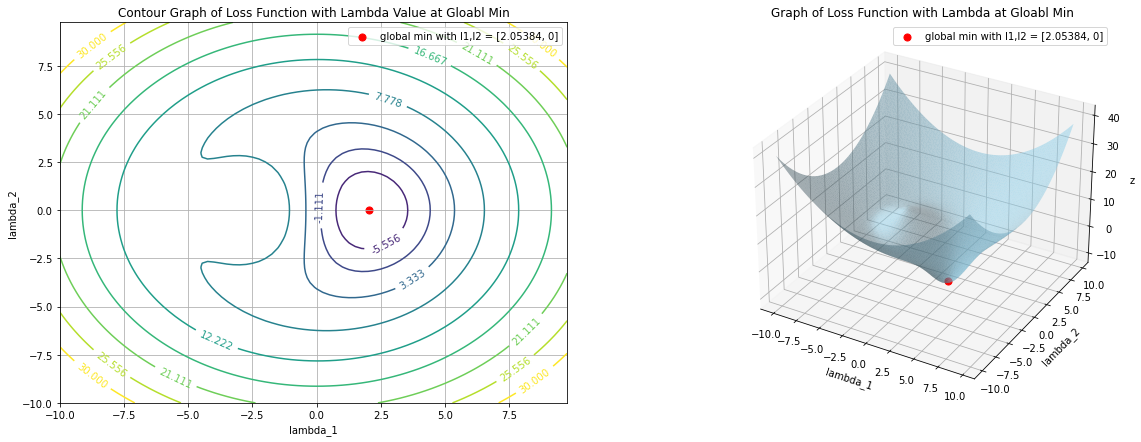

In [6]:
fig = plt.figure(figsize=(20, 7))

#plot contour map of pdf with data in R^2 (Cartesian plane)
ax1 = fig.add_subplot(121) 
contour = ax1.contour(l1, l2, z, levels = np.linspace(-10, 30, 10))
ax1.clabel(contour, inline=1, fontsize=10)
ax1.grid(True)
ax1.scatter([2.05384], [0], color='red', s=50, label='global min with l1,l2 = [2.05384, 0]')
ax1.set_title('Contour Graph of Loss Function with Lambda Value at Gloabl Min')
ax1.set_xlabel('lambda_1')
ax1.set_ylabel('lambda_2')
ax1.legend(loc='best')

#plot 3D suface of pdf in R^3, with data in R^2
ax2 = fig.add_subplot(122, projection='3d') 
ax2.plot_trisurf(l1.flatten(), l2.flatten(), z.flatten(), linewidth=0.2, antialiased=True, color='skyblue', alpha=0.5)
ax2.scatter([2.05384], [0], [loss(2.05384, 0, x, y)], color='red', s=50, label='global min with l1,l2 = [2.05384, 0]')
ax2.set_xlabel('lambda_1')
ax2.set_ylabel('lambda_2')
ax2.set_zlabel('z')
ax2.set_title('Graph of Loss Function with Lambda at Gloabl Min')
ax2.legend(loc='best')

plt.show()


In [7]:
print('The global minumum total loss value at point [2.05384, 0] is', loss(2.05384, 0, x, y))

The global minumum total loss value at point [2.05384, 0] is -9.934104025304476


<font color="darkblue">
    
**Interpretation**:

From the coutour, level curve and 3D plot, we could observe that the red dot point with coordinates `[2.05384, 0]` is the global minimal of our objective loss function, with a minimal value of `-9.9341`. There is another point near `(-2.5,0)` that may be a stationary point or local maxima, but it is not local min or what we were looking for.

2. (**Gradient Descent**) Implement gradient descent for minimizing the **average** of $L$ over the locations given in the data, using the learning rate of 1.0 and initialization of $\lambda_1 = 2, \lambda_2 = 1$. Visually determine if your algorithm has converged. 

  **Hint:** You may need to visualize the behavior over the total number of iterations as well as its value over the last couple of hundreds of iterations to check for convergence.<br><br>


In [8]:
lr = 1.0
l_init = [2, 1]
N = len(x)

In [9]:
#The gradient of the total loss function
def df_loss(l1, l2, x, y):
    dl1 = - 2 * 0.000098  * l1 * np.sum(x) + 0.003926 *np.sum(x)  * np.exp(-0.1 * (l1**2 + l2**2)) - 0.1 * 2 * 0.003926  * np.sum(x) * l1 **2 * np.exp(-0.1 * (l1**2 + l2**2))
    dl2 = 2 * 0.000045 * l2 * np.sum(y) - 0.1 * 2 * 0.003926 *  np.sum(x) * l1 * l2 * np.exp(-0.1 * (l1**2 + l2**2))
    return np.array([dl1, dl2])

def norm_to_min(point):
    return np.linalg.norm(point - np.array([2.05384, 0]))

def avg_loss(l1, l2, x, y):
    return loss(l1, l2, x, y)/len(x)

def avg_df_loss(l1, l2, x, y):
    return df_loss(l1, l2, x, y)/len(x)


Implement gradient descent and minimizing the **average** of $L$

In [10]:
# gradient descent
def gd(f, avg_f, df, x, y, l_init, step_size, total_iterations = 50000, threshold = 1e-3):
    l_prev = l_init
    total_loss = [f(l_init[0], l_init[1], x, y)]
    obj_vals = [avg_f(l_init[0], l_init[1], x, y)]
    lambda_lst = [l_init]
    grad_lst = [np.linalg.norm(df(l_init[0], l_init[1], x, y))]
    step = 0
    
    # stop condition (sufficiently close or reach max steps)
    while norm_to_min(l_prev) > threshold and step <= total_iterations:
        grad = df(l_prev[0], l_prev[1], x, y)
        # update new lamdba 
        l_prev = l_prev - step_size * grad
        # add new lambda, function value, and grad norm to history lists
        lambda_lst.append(l_prev)
        grad_lst.append(np.linalg.norm(grad))
        obj_vals.append(avg_f(l_prev[0], l_prev[1], x, y))
        total_loss.append(f(l_prev[0], l_prev[1], x, y))
        
        # update steps
        step += 1
        
    return total_loss, obj_vals, lambda_lst, grad_lst

In [11]:
total_loss, avg_loss_history_lst, lambda_lst, grad_lst = gd(loss, avg_loss, avg_df_loss, x, y, l_init, step_size = lr)

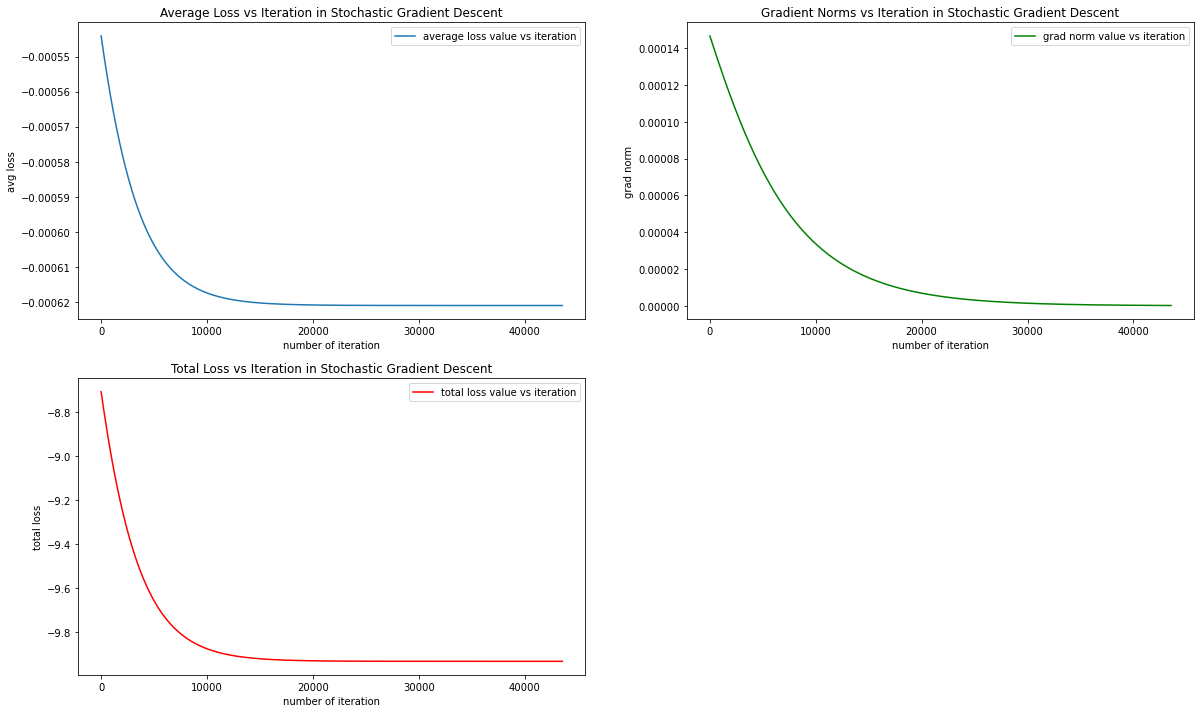

In [12]:
fig, ax = plt.subplots(2, 2, figsize=(20, 12))
ax[0][0].plot(range(len(avg_loss_history_lst)), avg_loss_history_lst, label='average loss value vs iteration')
ax[0][0].set_xlabel('number of iteration')
ax[0][0].set_ylabel('avg loss')
ax[0][0].set_title('Average Loss vs Iteration in Stochastic Gradient Descent')
ax[0][0].legend(loc='best')

ax[0][1].plot(range(len(grad_lst)), grad_lst, color='green', label='grad norm value vs iteration')
ax[0][1].set_xlabel('number of iteration')
ax[0][1].set_ylabel('grad norm')
ax[0][1].set_title('Gradient Norms vs Iteration in Stochastic Gradient Descent')
ax[0][1].legend(loc='best')

ax[1][0].plot(range(len(total_loss)), total_loss, color='red', label='total loss value vs iteration')
ax[1][0].set_xlabel('number of iteration')
ax[1][0].set_ylabel('total loss')
ax[1][0].set_title('Total Loss vs Iteration in Stochastic Gradient Descent')
ax[1][0].legend(loc='best')

ax[1][1].set_axis_off()


plt.show()

<font color="darkblue">
    
**Interpretation**:

From the visual, we could see that the gradient descent converge at the last few hundred steps. For total loss, it converges around `-9.9`. It generally stablized at the end, showing convergence. At first few iterations, we see large updates and big decrease of total loss; as time goes by, updates become smaller, and it corresponds to smaller gradients norm at that iteration. It means the loss function has converged to global minimal, where it is a stationary point with gradient approximate to zero. Thus, it results in negligible gradients and very small updates, ultimately converged to true global minimal point.
    

3. (**Stochastic Gradient Descent**) Implement stochastic gradient descent for minimizing the **average** of $L$ over the locations in the mini-batch, using the learning rate of 1.0 and initialization of $\lambda_1 = 2, \lambda_2 = 1$ and mini-batch size of 1. Visually determine if your algorithm has converged.

  **Hint:** You may need to visualize the behavior over the total number of iterations as well as its value over the last couple of hundreds of iterations to check for convergence.<br>


In [13]:
# stochastic gradient descent
def sgd(f,avg_f, df, x, y, l_init, step_size, mini_batch_size = 1, total_iterations = 50000, threshold = 1e-3, epochs = 20):
    l_prev = l_init
    total_loss = [f(l_init[0], l_init[1], x, y)]
    obj_vals = [avg_f(l_init[0], l_init[1], x, y)]
    lambda_lst = [l_init]
    grad_lst = [np.linalg.norm(df(l_init[0], l_init[1], x, y))]
    step = 0
    N = len(x)
    
    batches = int(N/ mini_batch_size)
    for epoch in range(epochs):
        #shuffle the data
        indices = np.arange(len(x))
        np.random.shuffle(indices)
        
        for i in range(batches):
            # divide into batches
            if i == batches - 1:
                # last batch takes all left over data
                batch_indices = indices[i * mini_batch_size:]
            else:
                batch_indices = indices[i * mini_batch_size:(i + 1) * mini_batch_size]            
            
            grad = df(l_prev[0], l_prev[1], x[batch_indices], y[batch_indices])
        
            # update new lamdba, with stochastic random noise
            l_prev = l_prev - step_size * grad
            
            # add new lambda, function value, and grad norm to history lists
            lambda_lst.append(l_prev)
            grad_lst.append(np.linalg.norm(grad))
            obj_vals.append(avg_f(l_prev[0], l_prev[1], x, y))
            total_loss.append(f(l_prev[0], l_prev[1], x, y))
            
            # check if converged
            if norm_to_min(l_prev) < threshold:
                return total_loss, obj_vals, lambda_lst, grad_lst
    return total_loss, obj_vals, lambda_lst, grad_lst

In [14]:
total_loss_sgd, avg_loss_history_lst_sgd, lambda_lst_sgd, grad_lst_sgd = sgd(loss, avg_loss, avg_df_loss, x = x, y = y, l_init = l_init, step_size = lr)

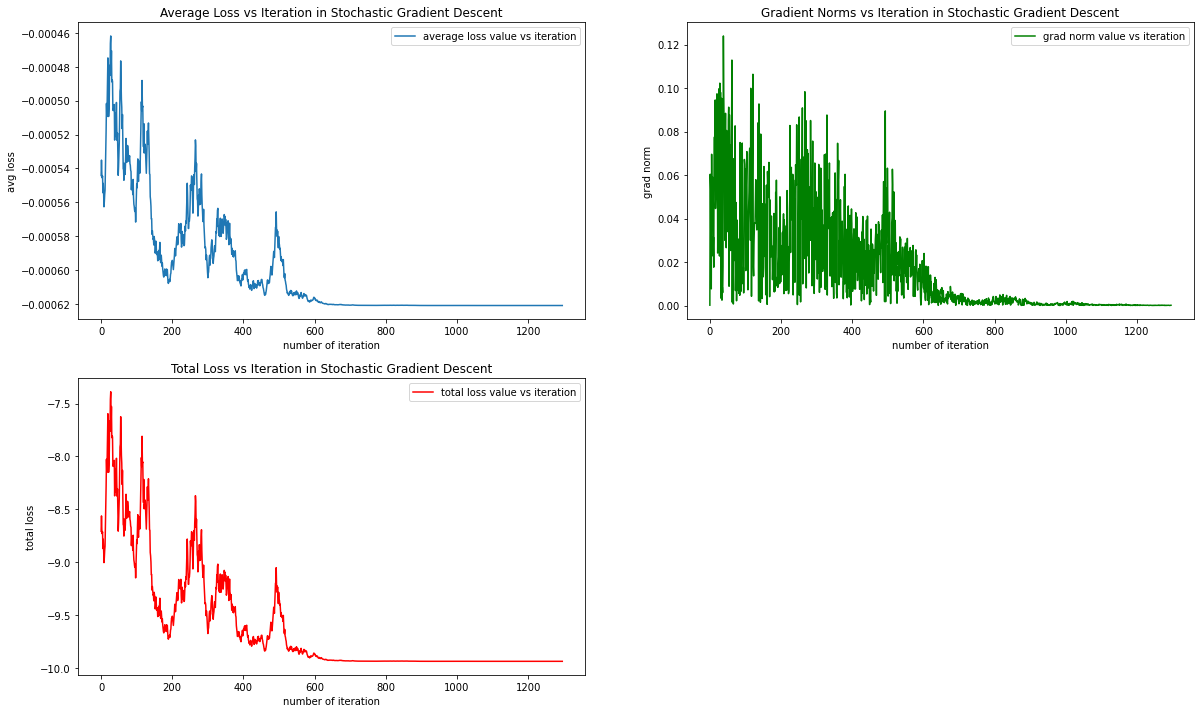

In [15]:
fig, ax = plt.subplots(2, 2, figsize=(20, 12))
ax[0][0].plot(range(len(avg_loss_history_lst_sgd)), avg_loss_history_lst_sgd, label='average loss value vs iteration')
ax[0][0].set_xlabel('number of iteration')
ax[0][0].set_ylabel('avg loss')
ax[0][0].set_title('Average Loss vs Iteration in Stochastic Gradient Descent')
ax[0][0].legend(loc='best')

ax[0][1].plot(range(len(grad_lst_sgd)), grad_lst_sgd, color='green', label='grad norm value vs iteration')
ax[0][1].set_xlabel('number of iteration')
ax[0][1].set_ylabel('grad norm')
ax[0][1].set_title('Gradient Norms vs Iteration in Stochastic Gradient Descent')
ax[0][1].legend(loc='best')

ax[1][0].plot(range(len(total_loss_sgd)), total_loss_sgd, color='red', label='total loss value vs iteration')
ax[1][0].set_xlabel('number of iteration')
ax[1][0].set_ylabel('total loss')
ax[1][0].set_title('Total Loss vs Iteration in Stochastic Gradient Descent')
ax[1][0].legend(loc='best')

ax[1][1].set_axis_off()


plt.show()



Last few hundred value:

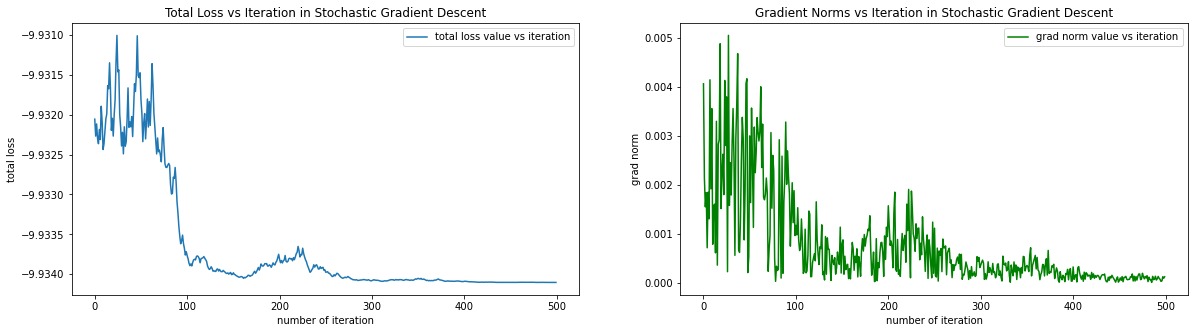

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
ax[0].plot(range(len(total_loss_sgd[-500:])), total_loss_sgd[-500:], label='total loss value vs iteration')
ax[0].set_xlabel('number of iteration')
ax[0].set_ylabel('total loss')
ax[0].set_title('Total Loss vs Iteration in Stochastic Gradient Descent')
ax[0].legend(loc='best')

ax[1].plot(range(len(grad_lst_sgd[-500:])), grad_lst_sgd[-500:], color='green', label='grad norm value vs iteration')
ax[1].set_xlabel('number of iteration')
ax[1].set_ylabel('grad norm')
ax[1].set_title('Gradient Norms vs Iteration in Stochastic Gradient Descent')
ax[1].legend(loc='best')
plt.show()


<font color="darkblue">
    
**Interpretation**:

From the visual, we could see that the stochastic gradient descent converge at the last few hundred steps. For total loss, it converges around `-9.9` with some subtle ups and downs. It generally stablized at the end, showing convergence. The difference with gradient descent is that noise and randomness from shuffling in batches could sometimes cause increase in objective function.
    
At first few iterations, we see large updates with fluctuations ups and down, with total loss sometimes even increase; as time goes by, updates become smaller, and it corresponds to smaller gradients norm at that iteration. It means the loss function has converged to global minimal, where it is a stationary point with gradient approximate to zero. Thus, it results in negligible gradients and very small updates, ultimately converged to true global minimal point. When examing the total loss for the last 500 iterations, we could observe that stochastic gradient descent is fluctuating and ocillating around the optimal loss of `9.93`. If we use a higher precision, it may not converge.
 
    

4. (**How to Compare GD and SGD Fairly**) Argue that minimizing the average loss over the locations is equivalent to minimizing the net loss. However, minimizing the average loss makes it possible to compare gradient descent and stochastic gradient descent on equal terms. Explain why this is true.<br>

<font color="darkblue">
    
**Answer**:

Minimizing the average loss over the locations is equivalent to minimizing the net loss as total net loss is equivalent to the number of observations times average loss. And because the number of observations is a constant in our case, which is `len(x)`, thus, this two values are essentially the same.

However, because the net loss is in proportion to the number of observations, and in stochastic gradient descent,
we divided the whole dataset into batches based on mini batch sizes. Thus, the net loss of SGD highly depends on the size of each batch. Therefore, if we would like to compare the net loss of gradient descent and stochastic gradient descent, using the net loss as objective function makes no sense. However, it we use the average loss and compute net loss in SGD over number of observations, then the loss value is the average value of the number of observations, and thus makes it possible to compare GD and SGD on equal terms.

The other problem using net loss would be that the gradients taken from derivative of loss function will tend to give larger value in each gradient descent step, which may lead to larger step each round, faster convergence, or bouncing around in objective function and never converge to local minimal.

5. (**Comparing the Efficiency of GD and SGD**) Compute the average time it takes to update the parameter estimation in each iteration of the two implementations. Which method is faster? Briefly explain why this result should be expected.

  Compare the number of iterations it takes for each algorithm to obtain an estimate accurate to `1e-3` (in this case, you know the true global optima so you can check the norm $\|(\lambda_1, \lambda_2) - (\lambda_1^{\text{true}}, \lambda_2^{\text{true}})\|_2$ ). Which method converges to the optimal point in fewer iterations? Briefly explain why this result should be expected.<br><br>


In [17]:
start_gd = time.time()
total_loss, avg_loss_history_lst, lambda_lst, grad_lst = gd(loss, avg_loss, avg_df_loss, x, y, l_init, step_size = lr, threshold = 1e-3)
end_gd = time.time() 
iterations = len(total_loss)

avg_time_gd = (end_gd-start_gd)/iterations
print("Number of iteration for GD to converge is ", iterations)
print("Average time it takes to update the parameter estimation in each iteration for GD is %.10f"%avg_time_gd)


Number of iteration for GD to converge is  43545
Average time it takes to update the parameter estimation in each iteration for GD is 0.0001033653


In [18]:
start_sgd = time.time()
total_loss_sgd, avg_loss_history_lst_sgd, lambda_lst_sgd, grad_lst_sgd = sgd(loss, avg_loss, avg_df_loss, x = x, y = y, l_init = l_init, step_size = lr, threshold = 1e-3)
end_sgd = time.time()
iterations = len(total_loss_sgd)

avg_time_sgd = (end_sgd-start_sgd)/iterations
print("Number of iteration for SGD to converge is ", iterations)
print("Average time it takes to update the parameter estimation in each iteration for SGD is %.10f"%avg_time_sgd)


Number of iteration for SGD to converge is  7319
Average time it takes to update the parameter estimation in each iteration for SGD is 0.0000866336


<font color="darkblue">
    
**Answer**:
    
* SGD takes less average time to update lambda for each iteration, which is `0.00009`; and GD takes slighlty longer time to update lambda at each iteration, which is `0.00010`. This is expected, as GD is performed at entire dataset for each round of update; while SGD uses mini-batch with size 1 and each round are updating based on one data point. However, the difference is not that obvious, as our data set is not very big with only 16000 data points, thus summing over entire dataset doesn't take much more marginal time complexity than one point.
    

* SGD converges faster to optimal point within `3000` iterations, while GD takes way longer than that, which is more than `40000` iterations. This is a bit unexpected, because in SGD, with randomness introduced in shuffling data for each epoch, it introduced noise into our gradient descent. Thus sometimes we see objective function increase. It could help to jump out of local minimal and sometimes climb up hills, but it normally leads to slower convergence, and the algorithm can even fail to converge at all.
    


6. (**Comparing Sensitivity of GD and SGD to Learning Rate**) Compare the performance of both gradient descent methods for the following learning rates: 1000, 100, 1., 0.1. Based on your observations, briefly describe the effect of the choice of learning rate on the performance of each algorithm. In particular, which algorithm is more sensitve to the learning rate?

  **Hint:** You may need to visualize the behavior over the total number of iterations as well as its value over the first and last couple of hundreds of iterations separately to isolate trends.<br>

learning rate:  1000
converged in 42nt round with last total loss function value of -9.9341
-----------
learning rate:  100
converged in 434nt round with last total loss function value of -9.9341
-----------
learning rate:  1
converged in 43545nt round with last total loss function value of -9.9341
-----------
learning rate:  0.1
converged in 50002nt round with last total loss function value of -9.6584
-----------


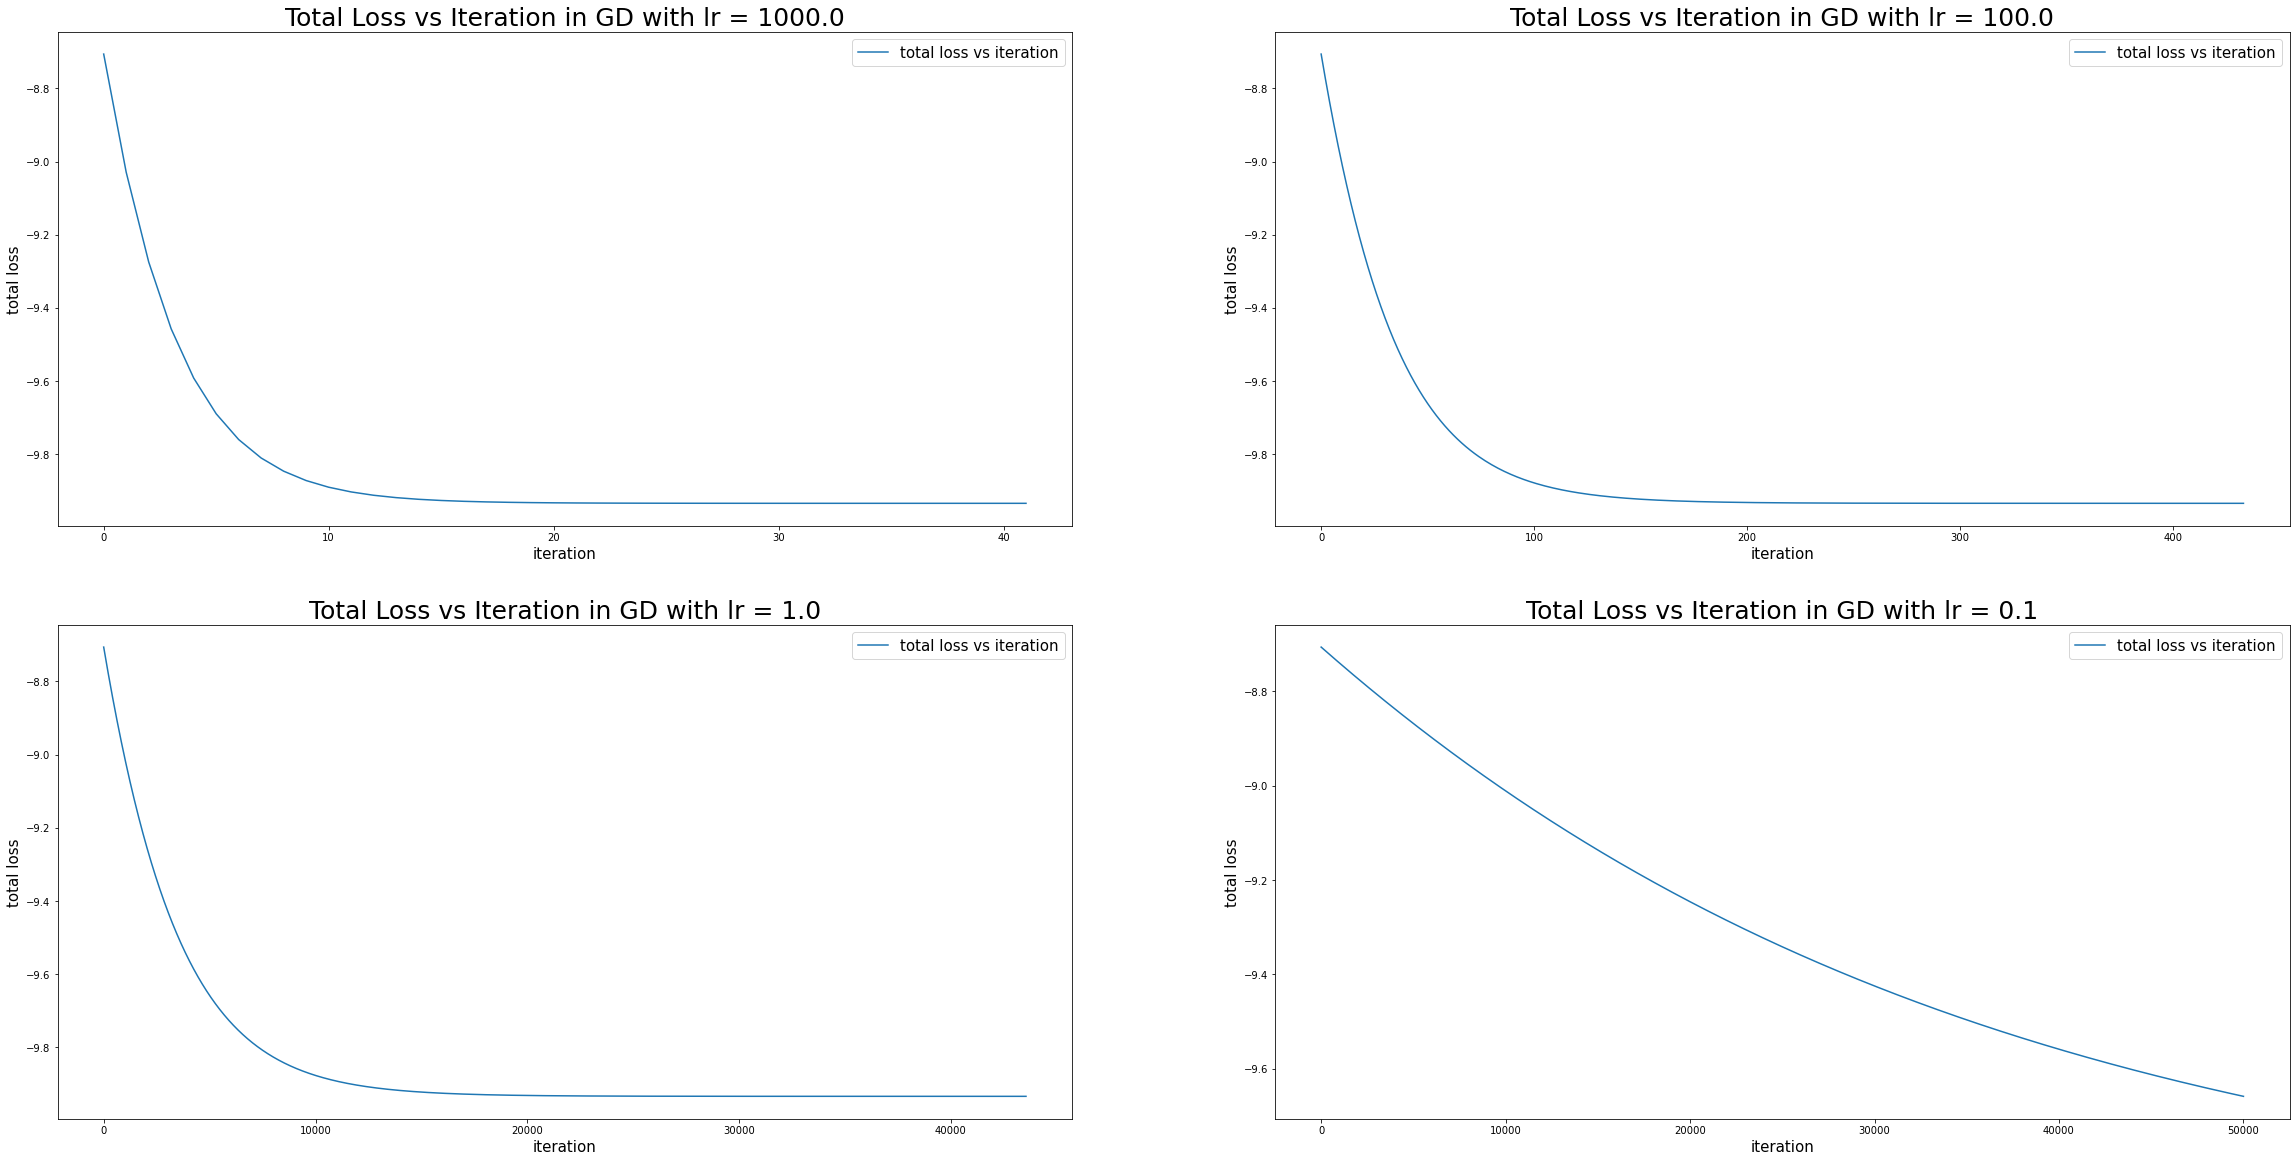

In [19]:
learning_rate = [1000, 100, 1, 0.1]

fig, ax = plt.subplots(2, 2, figsize=(40, 20))

for i in range(len(learning_rate)):
    lr = learning_rate[i]
    total_loss, avg_loss_history_lst, lambda_lst, grad_lst = gd(loss, avg_loss, avg_df_loss, x, y, l_init, step_size = lr, threshold = 1e-3)
    print("learning rate: ", lr)
    print("converged in %int round with last total loss function value of %.4f"%(len(total_loss), total_loss[-1]))
    print("-----------")
    
    # plot 
    ax[i//2][i%2].plot(range(len(total_loss)), total_loss, label='total loss vs iteration')
    ax[i//2][i%2].set_xlabel('iteration',  fontsize = 15)
    ax[i//2][i%2].set_ylabel('total loss', fontsize = 15)
    ax[i//2][i%2].set_title('Total Loss vs Iteration in GD with lr = %.1f'%lr, fontsize = 25)
    ax[i//2][i%2].legend(loc='best', fontsize = 15)

<font color="darkblue">
    
**Interpretation**:

From the plot above, based on the current initialization we choose, we could observe that gradient descent is not very sensitive to the step size. For different learning rate, they all converge and approximately reached a stablized level. The learning rate decides how many iterations the algorithm need to loop through to converge. 

* For lr = 1000, it takes less iterations, around 40. 
* For lr = 100, it takes around 400+ iterations
* For lr = 1.0, it takes longer iterations and converge much slower, more than 40000 to converge.
* For lr = 0.1, it hasn't converge yet when we reach max num of steps. 
It converges more slowly when learning rate become smaller. But all of them (except for lr = 0.1 due to not enough iterations) converged eventually to global minimal point with loss function value `-9.93`
    
    

In [20]:
import warnings
warnings.filterwarnings("ignore")



learning rate:  1000
converged in 320001 round with last total loss function value of nan
-----------
learning rate:  100
converged in 54296 round with last total loss function value of -9.9341
-----------
learning rate:  1
converged in 11163 round with last total loss function value of -9.9341
-----------
learning rate:  0.1
converged in 194127 round with last total loss function value of -9.9341
-----------


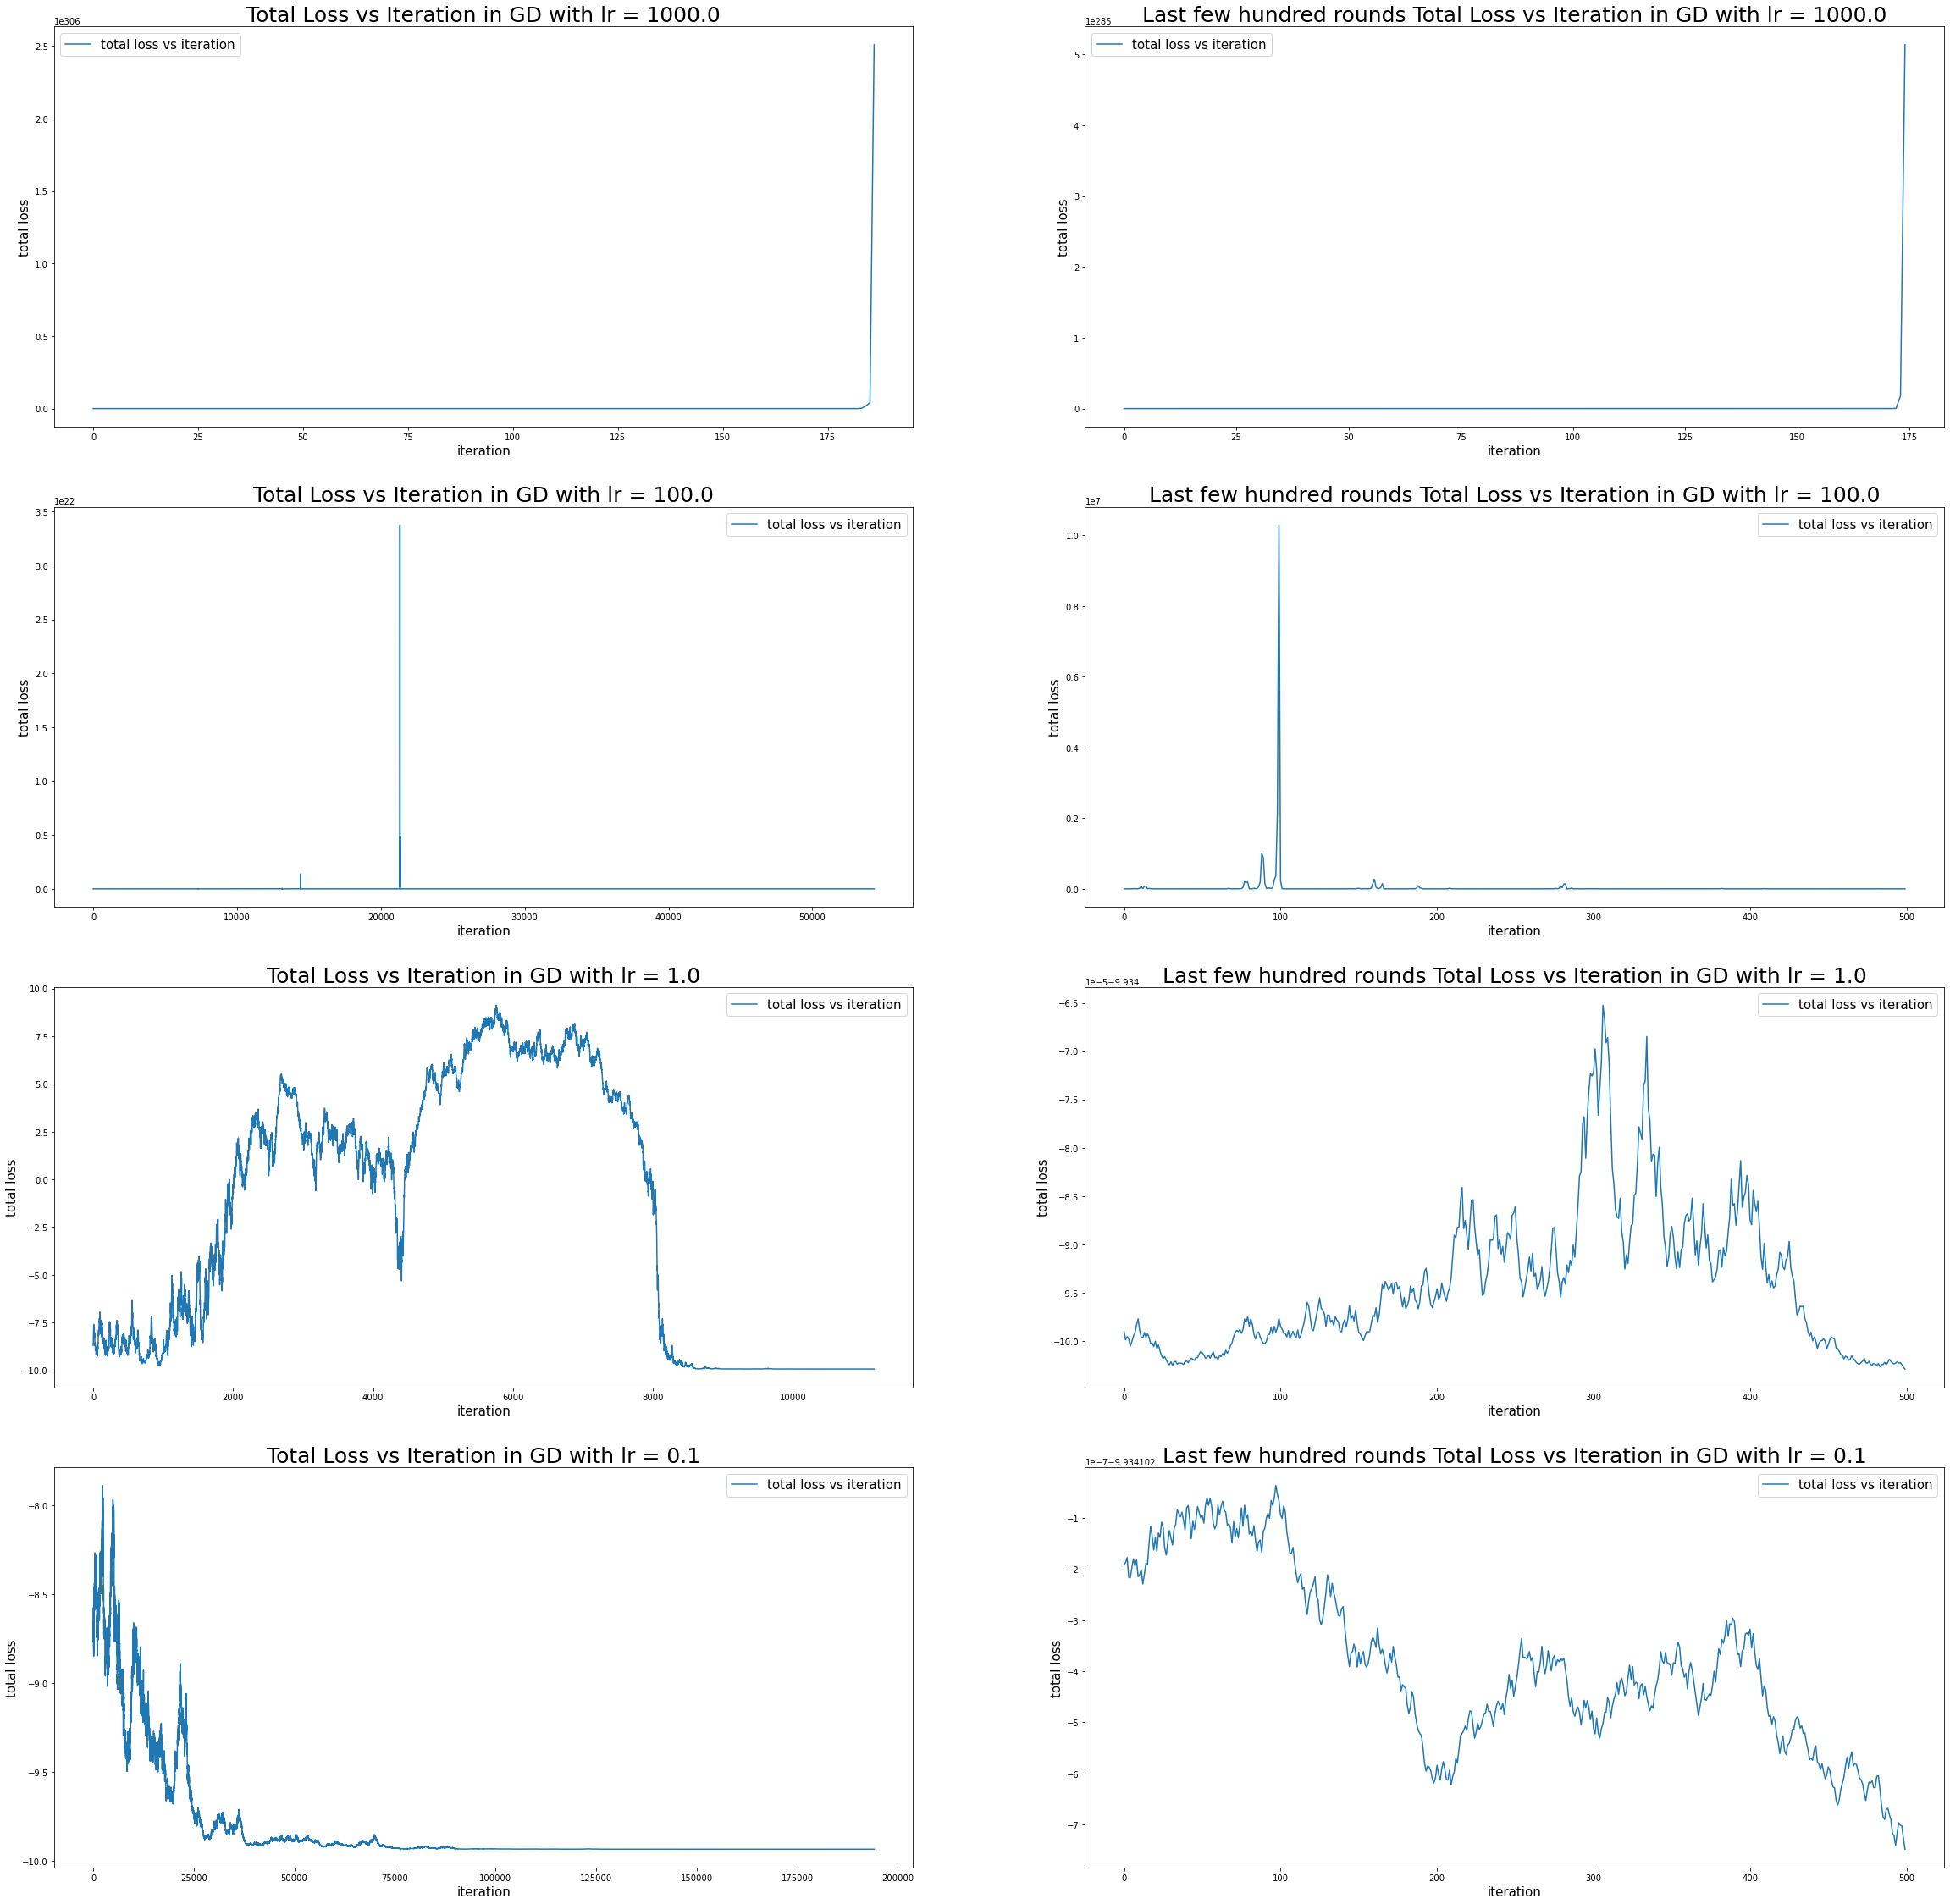

In [21]:
fig, ax = plt.subplots(4, 2, figsize=(40, 40))

for i in range(len(learning_rate)):
    lr = learning_rate[i]
    total_loss_sgd, avg_loss_history_lst_sgd, lambda_lst_sgd, grad_lst_sgd = sgd(loss, avg_loss, avg_df_loss, x = x, y = y, l_init = l_init, step_size = lr, threshold = 1e-3)
    print("learning rate: ", lr)
    print("converged in %i round with last total loss function value of %.4f"%(len(total_loss_sgd), total_loss_sgd[-1]))
    print("-----------")
    
    # plot 
    ax[i][0].plot(range(len(total_loss_sgd)), total_loss_sgd, label='total loss vs iteration')
    ax[i][0].set_xlabel('iteration',  fontsize = 15)
    ax[i][0].set_ylabel('total loss', fontsize = 15)
    ax[i][0].set_title('Total Loss vs Iteration in GD with lr = %.1f'%lr, fontsize = 25)
    ax[i][0].legend(loc='best', fontsize = 15)
    
    # plot last few hundreds of iterations for SGD
    if lr == 1000:
        ax[i][1].plot(range(len(total_loss_sgd[:175])), total_loss_sgd[:175], label='total loss vs iteration')
    else:
        ax[i][1].plot(range(len(total_loss_sgd[-500:])), total_loss_sgd[-500:], label='total loss vs iteration')
    ax[i][1].set_xlabel('iteration',  fontsize = 15)
    ax[i][1].set_ylabel('total loss', fontsize = 15)
    ax[i][1].set_title('Last few hundred rounds Total Loss vs Iteration in GD with lr = %.1f'%lr, fontsize = 25)
    ax[i][1].legend(loc='best', fontsize = 15)

<font color="darkblue">
    
**Interpretation**:

From the plot above, based on the current initialization we choose, we could observe that stochastic gradient descent is very sensitive to the step size, but there's also a lot of randomness inside. For different learning rate, three of them converged and approximately reached a stablized level. The learning rate doesn't simply decide how many iterations the algorithm need to loop through to converge, there's a bit randomness with learning rate being 1 the most appropriate and showing fastest convergence. 

* For lr = 1000, the step is too big, it overshoot and even diverge. It never converges.
* For lr = 100, it takes around 54296 iterations to converge to global minimal.
* For lr = 1.0, it takes around 11163 iterations to converge to global minimal.
* For lr = 0.1, it takes around 194127 iterations to converge to global minimal. It converges much more slowly when learning rate become smaller. 

But all of them (except for lr = 1000 due to too large step size) converged eventually to global minimal point with loss function value `-9.93`. However the converging speed differ a lot, and not solely depend on learning rate, but also involve some randomness. It could be the reason that the stochastic algorithm sometimes are climbing up the hills even if we are around global optimal point, and a smaller learning rate meaning it will climb and come back to this global minimal slower and needs more iterations to converge. 
It is clear that SGD is more sensitive to learning rate than GD. In GD, almost all trials are converging even though the learning rate is fairly large, e.g. 1000, while in SGD, when learning rate become large, it shows diverging instead of converging. 
    
    

7. (**Comparing Sensitivity of GD and SGD to Initialization**) Document the behaviour of your two descent algorithms for the following starting points, and for learning rates of 10 and 50:
  - $(\lambda_1, \lambda_2) = (-2.47865, 0)$
  - $(\lambda_1, \lambda_2) = (-3, 0)$
  - $(\lambda_1, \lambda_2) = (-5, 0)$
  - $(\lambda_1, \lambda_2) = (-10, 0)$

  Based on your visualization of the graph/contour map of the lost function as well as the visualization of the loss function during descent, explain what is happening to your descent algorithms for each initialization.

In [22]:
lambdas_inits = [[-2.47865, 0], [-3, 0], [-5, 0], [-10, 0]]
learning_rate = [10, 50]



### Sensitivity of Gradient Descent to Initialization

learning rate:  10 ; lambda init [-2.47865, 0]
converged in 50002 round with last total loss function value of 8.1615
-----------
learning rate:  10 ; lambda init [-3, 0]
converged in 50002 round with last total loss function value of 8.1615
-----------
learning rate:  10 ; lambda init [-5, 0]
converged in 50002 round with last total loss function value of 8.1615
-----------
learning rate:  10 ; lambda init [-10, 0]
converged in 50002 round with last total loss function value of 8.1615
-----------
learning rate:  50 ; lambda init [-2.47865, 0]
converged in 50002 round with last total loss function value of 8.1615
-----------
learning rate:  50 ; lambda init [-3, 0]
converged in 50002 round with last total loss function value of 8.1615
-----------
learning rate:  50 ; lambda init [-5, 0]
converged in 50002 round with last total loss function value of 8.1615
-----------
learning rate:  50 ; lambda init [-10, 0]
converged in 50002 round with last total loss function value of 8.1615
------

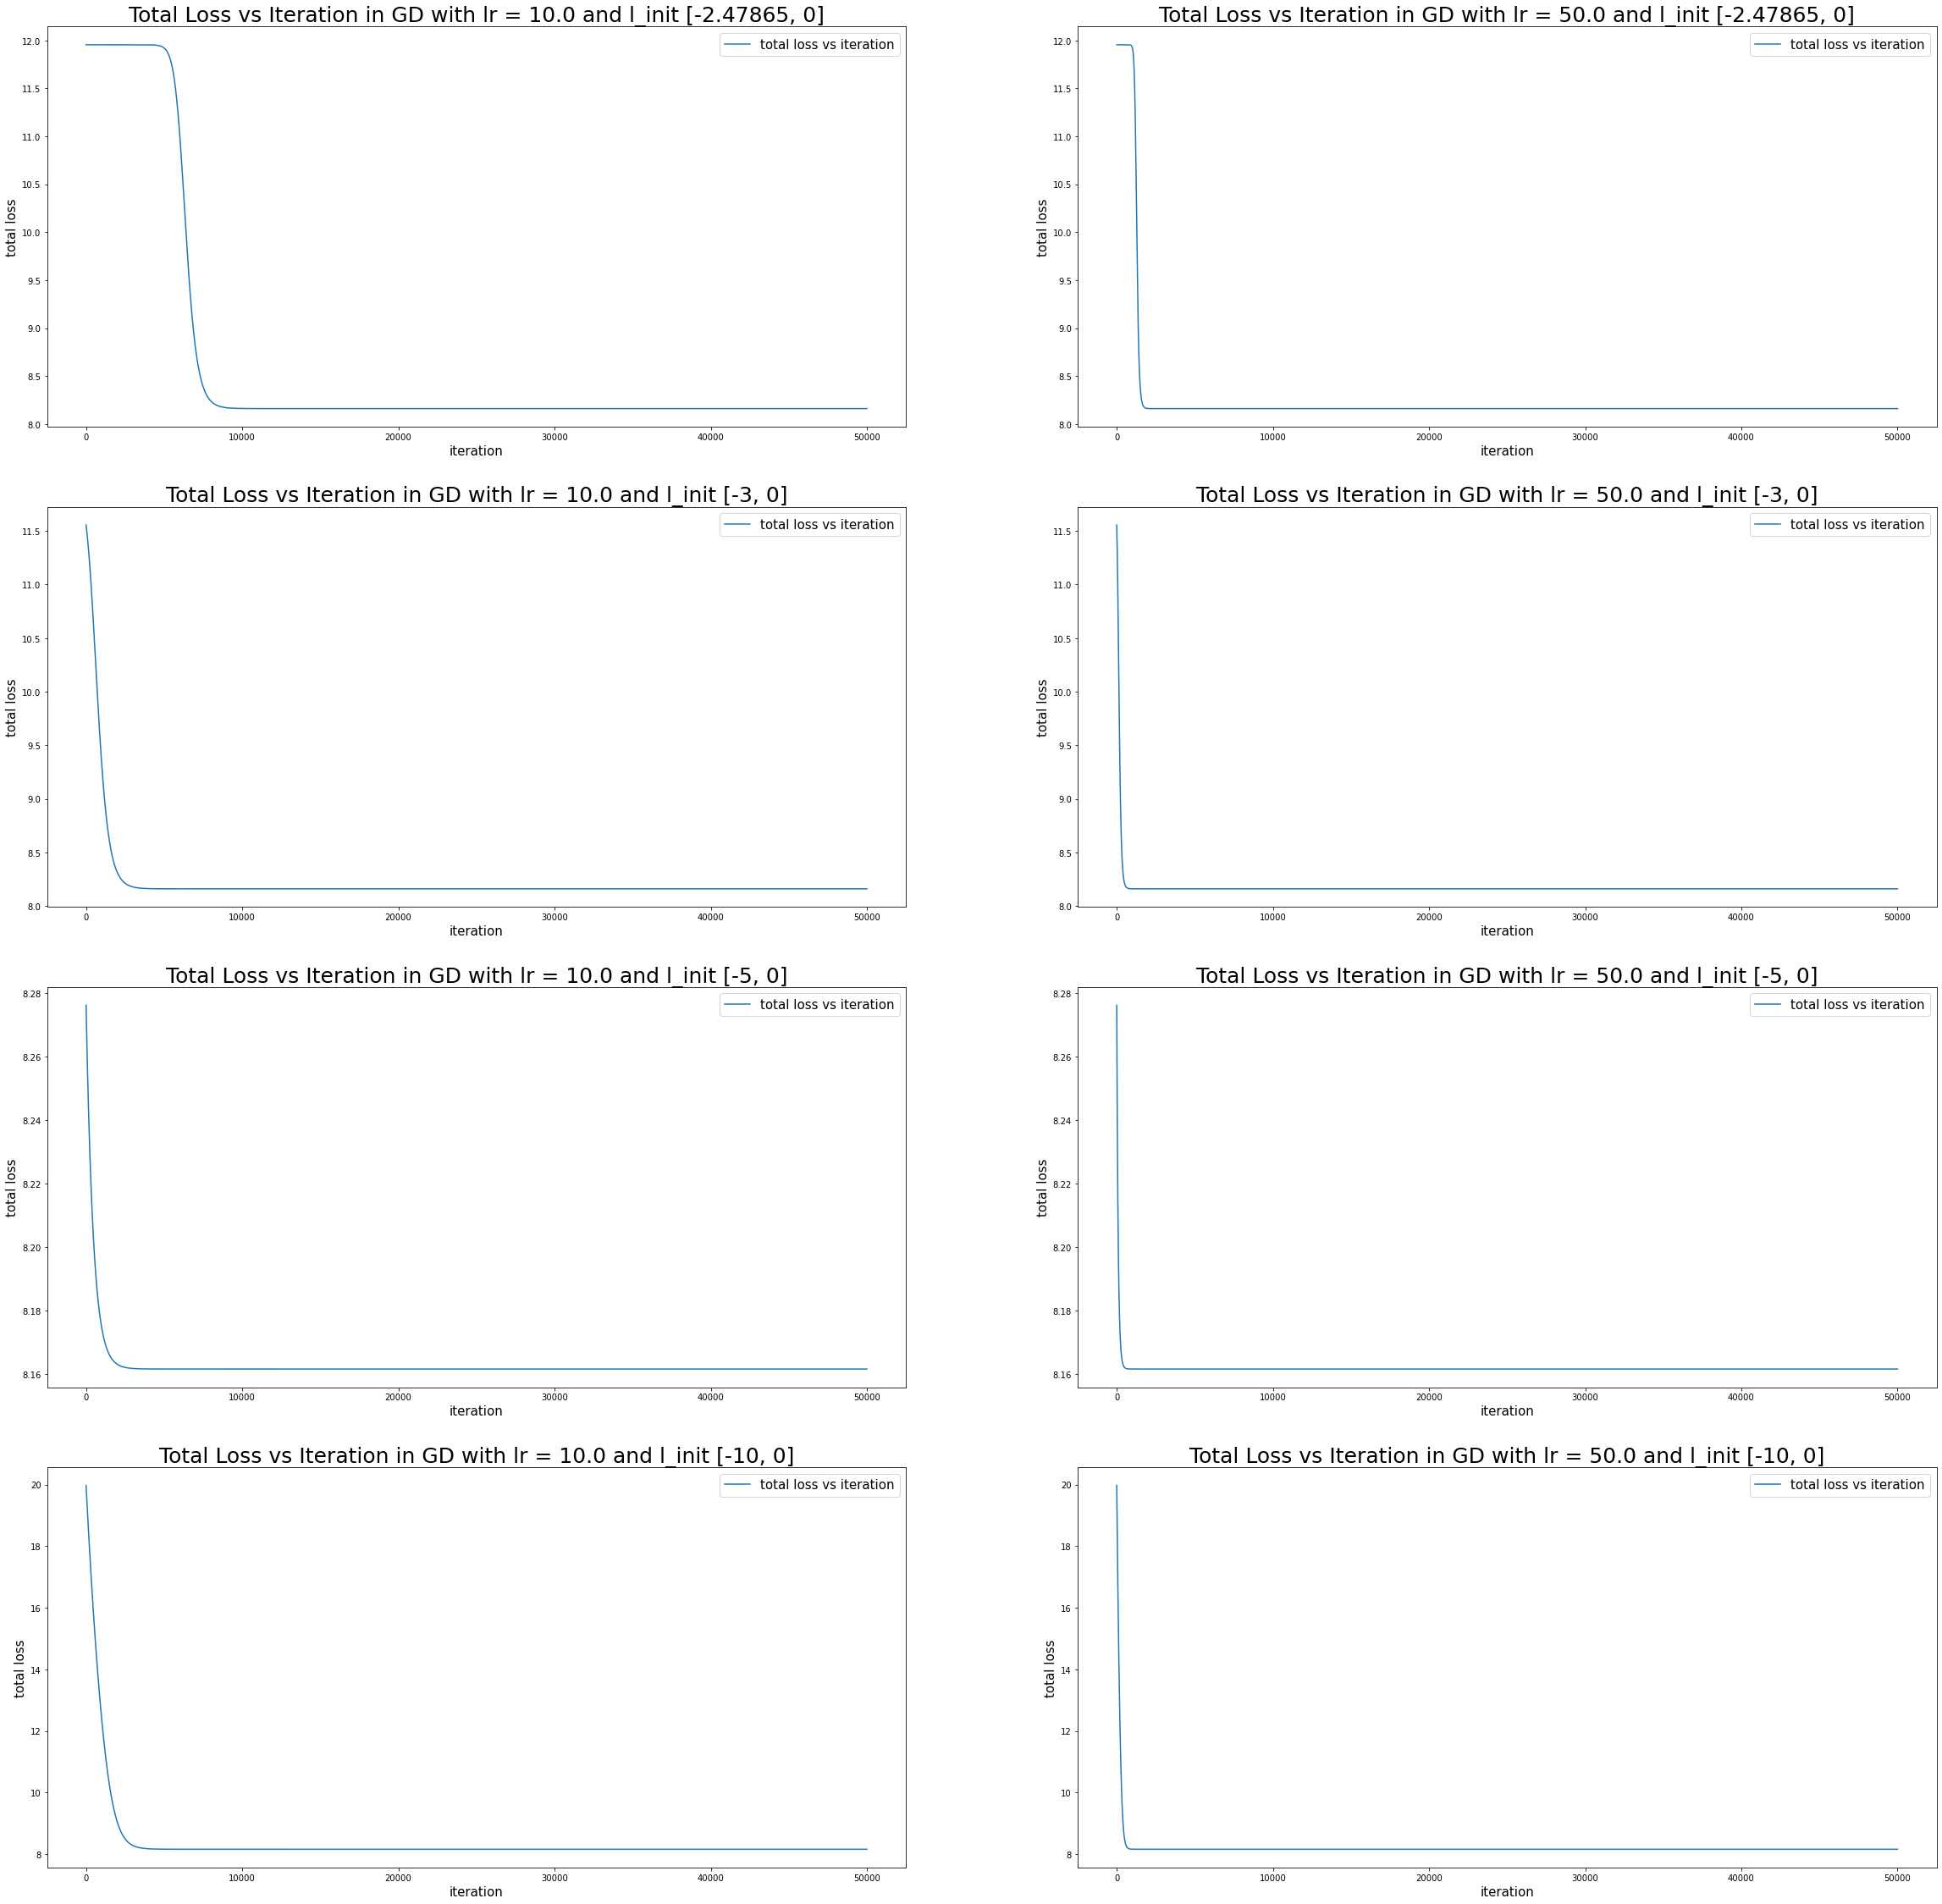

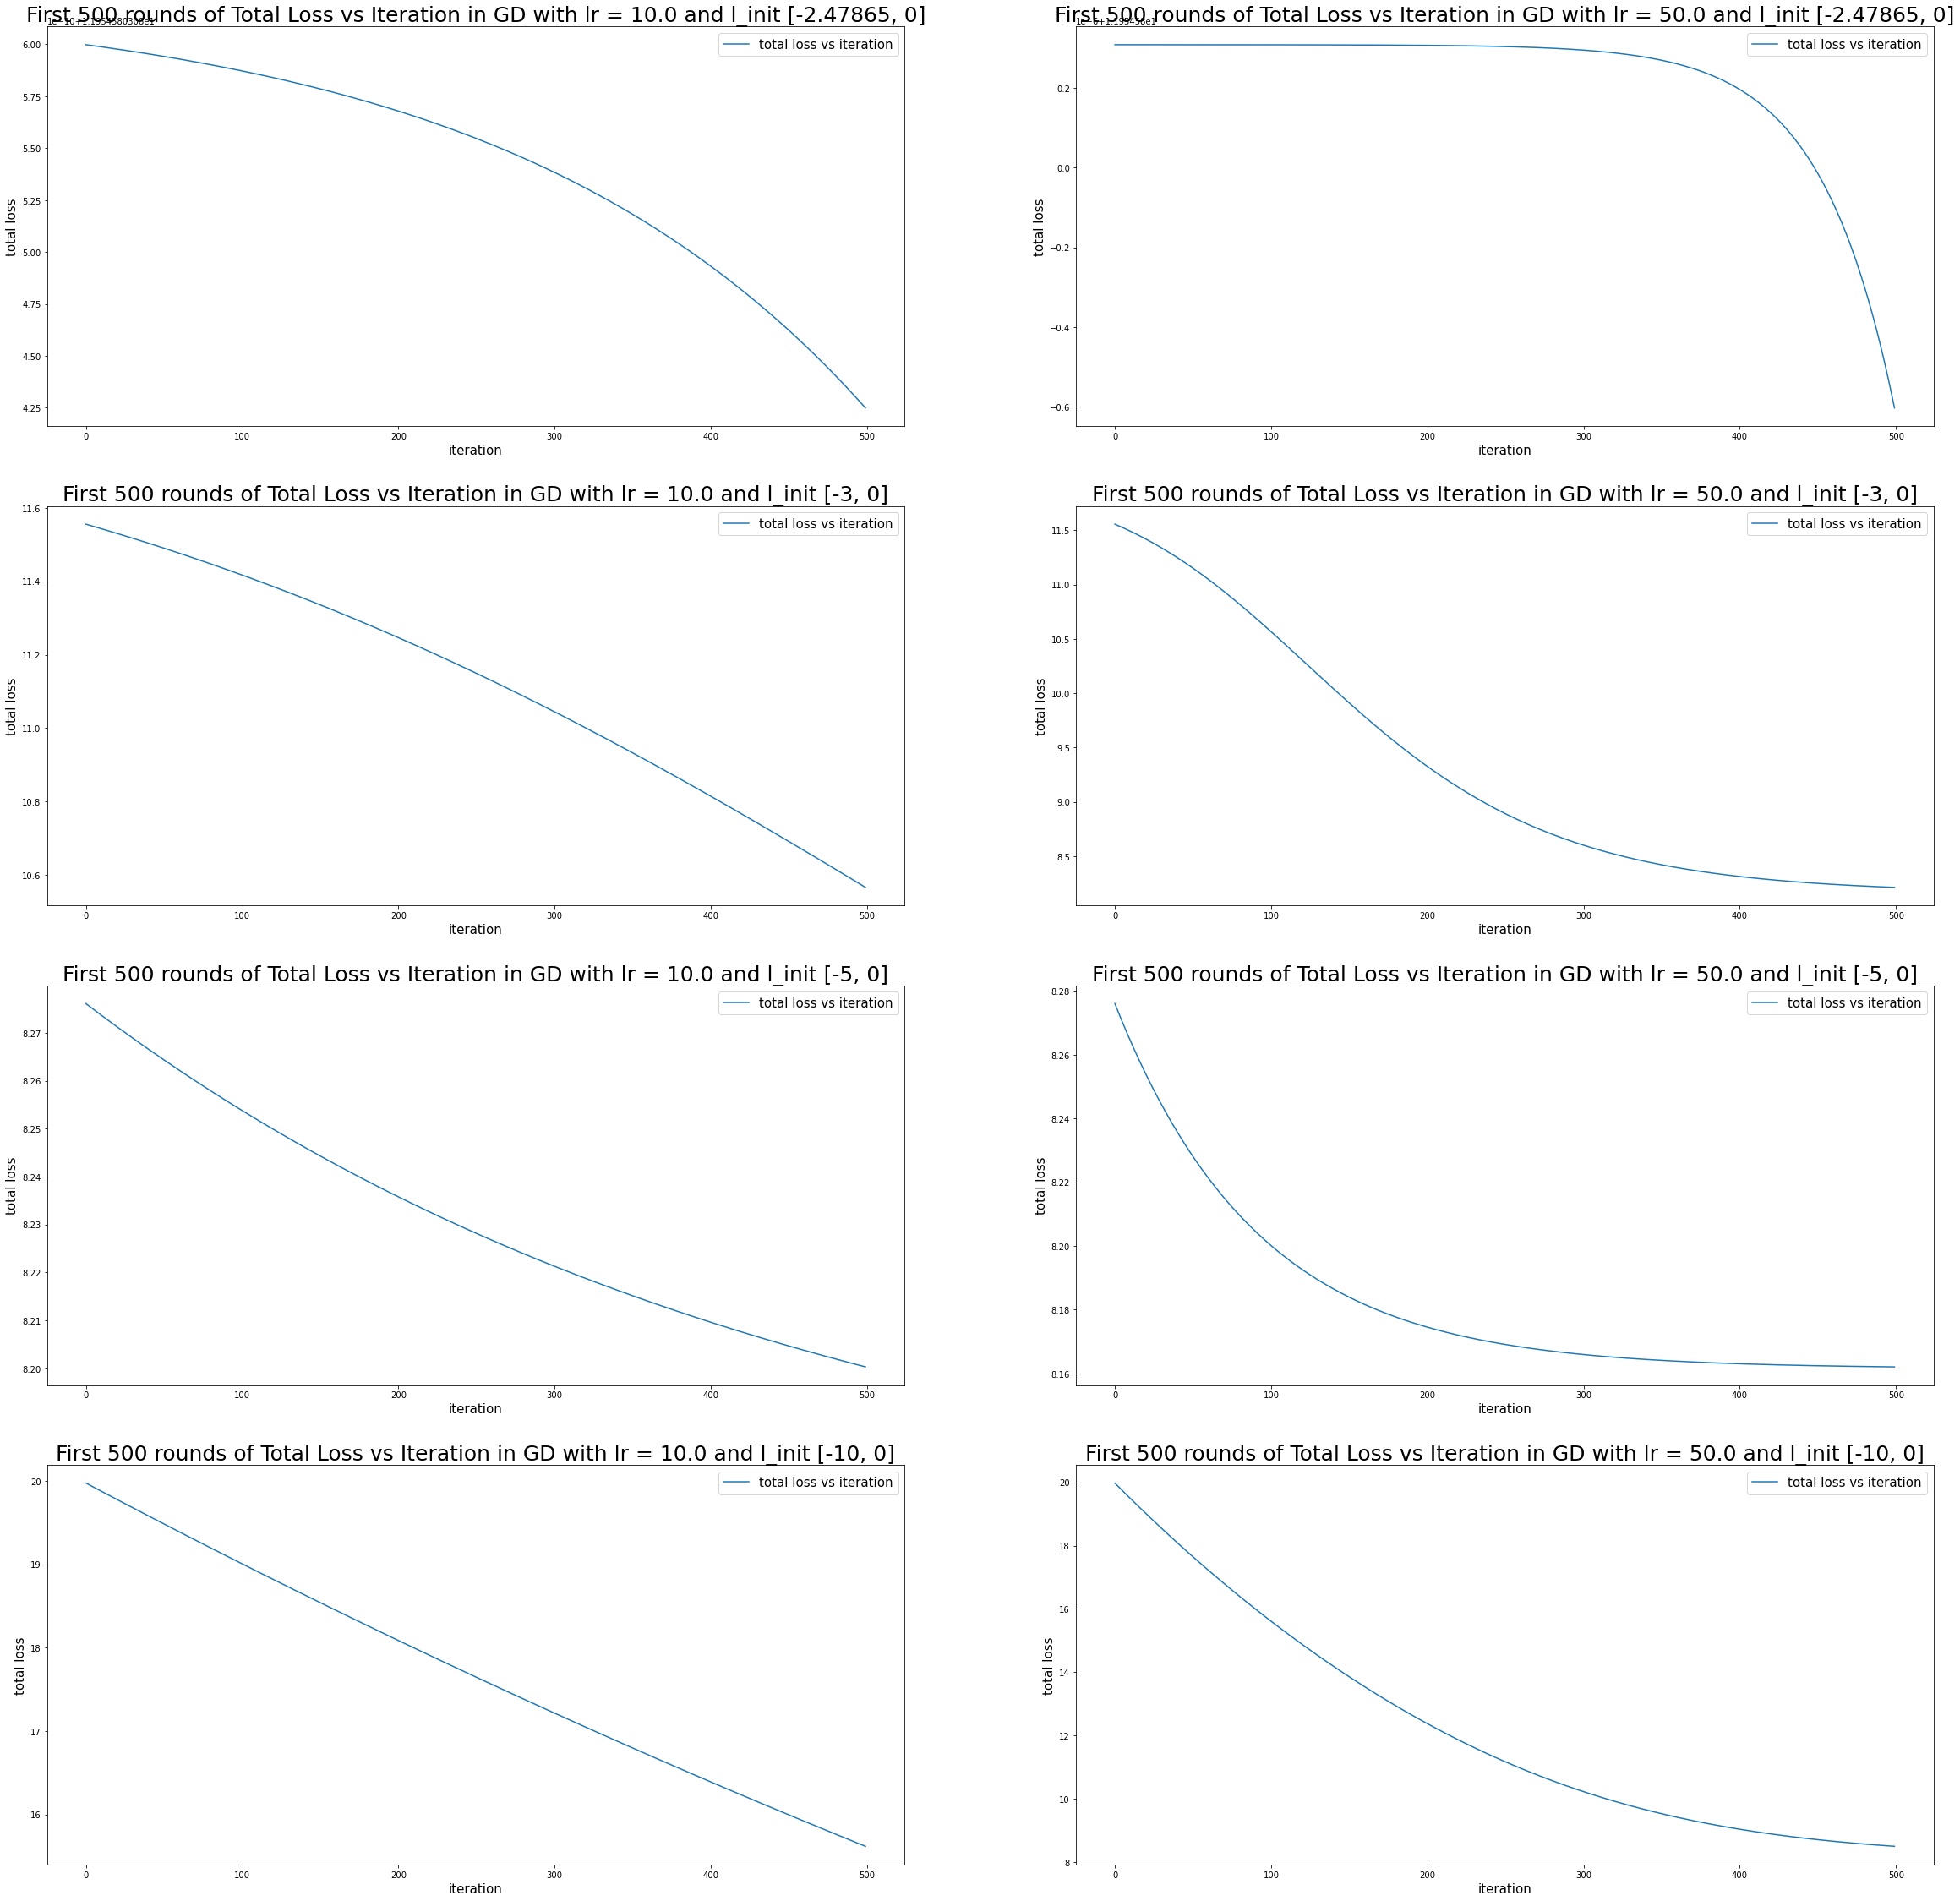

In [23]:
fig, ax = plt.subplots(4, 2, figsize=(40, 40))
fig1, ax1 = plt.subplots(4, 2, figsize=(40, 40))

for i in range(len(learning_rate)):
    for j in range(len(lambdas_inits)):
        lr = learning_rate[i]
        l_init = lambdas_inits[j]
        total_loss, avg_loss_history_lst, lambda_lst, grad_lst = gd(loss, avg_loss, avg_df_loss, x, y, l_init, step_size = lr, threshold = 1e-3)
        print("learning rate: ", lr, "; lambda init", str(l_init))
        print("converged in %i round with last total loss function value of %.4f"%(len(total_loss), total_loss[-1]))
        print("-----------")
        
        # plot 
        ax[j][i].plot(range(len(total_loss)), total_loss, label='total loss vs iteration')
        ax[j][i].set_xlabel('iteration',  fontsize = 15)
        ax[j][i].set_ylabel('total loss', fontsize = 15)
        ax[j][i].set_title('Total Loss vs Iteration in GD with lr = %.1f'%lr + ' and l_init '+str(l_init), fontsize = 25)
        ax[j][i].legend(loc='best', fontsize = 15)
        
        # plot first 500
        ax1[j][i].plot(range(len(total_loss[:500])), total_loss[:500], label='total loss vs iteration')
        ax1[j][i].set_xlabel('iteration',  fontsize = 15)
        ax1[j][i].set_ylabel('total loss', fontsize = 15)
        ax1[j][i].set_title('First 500 rounds of Total Loss vs Iteration in GD with lr = %.1f'%lr + ' and l_init '+str(l_init), fontsize = 25)
        ax1[j][i].legend(loc='best', fontsize = 15)
    

<font color="darkblue">
    
**Interpretation**:


From the group we could see that GD are quite sensitive to initialization point. 

Apparently with our selection of learning rate = 10 and 50, all of the cases were trapped at another saddle/stationary point with value `8.16`, which is not the global minimal point `-9.93`. When gradient descent lands on either the local max or the saddle point, it will be trapped at that place due to `0` gradient at that point, and convergence would not happen at the correct global optimal value. From first 500 rounds, we observe at different initial points, and different learning rate, the converge curves vary slightly from each other with different rate and slope. However, all of them end up with the saddle point and couldn't climb up hills to get out of the saddle point due to no randomness involved in gradient descent. 
    

### Sensitivity of Stochastic Gradient Descent to Initialization

learning rate:  10 ; lambda init [-2.47865, 0]
converged in 320001 round with last total loss function value of 11.9546
-----------
learning rate:  10 ; lambda init [-3, 0]
converged in 320001 round with last total loss function value of 11.9546
-----------
learning rate:  10 ; lambda init [-5, 0]
converged in 320001 round with last total loss function value of 8.1615
-----------
learning rate:  10 ; lambda init [-10, 0]
converged in 320001 round with last total loss function value of 8.1615
-----------
learning rate:  50 ; lambda init [-2.47865, 0]
converged in 12242 round with last total loss function value of -9.9341
-----------
learning rate:  50 ; lambda init [-3, 0]
converged in 10844 round with last total loss function value of -9.9341
-----------
learning rate:  50 ; lambda init [-5, 0]
converged in 19620 round with last total loss function value of -9.9341
-----------
learning rate:  50 ; lambda init [-10, 0]
converged in 52240 round with last total loss function value of -9.9

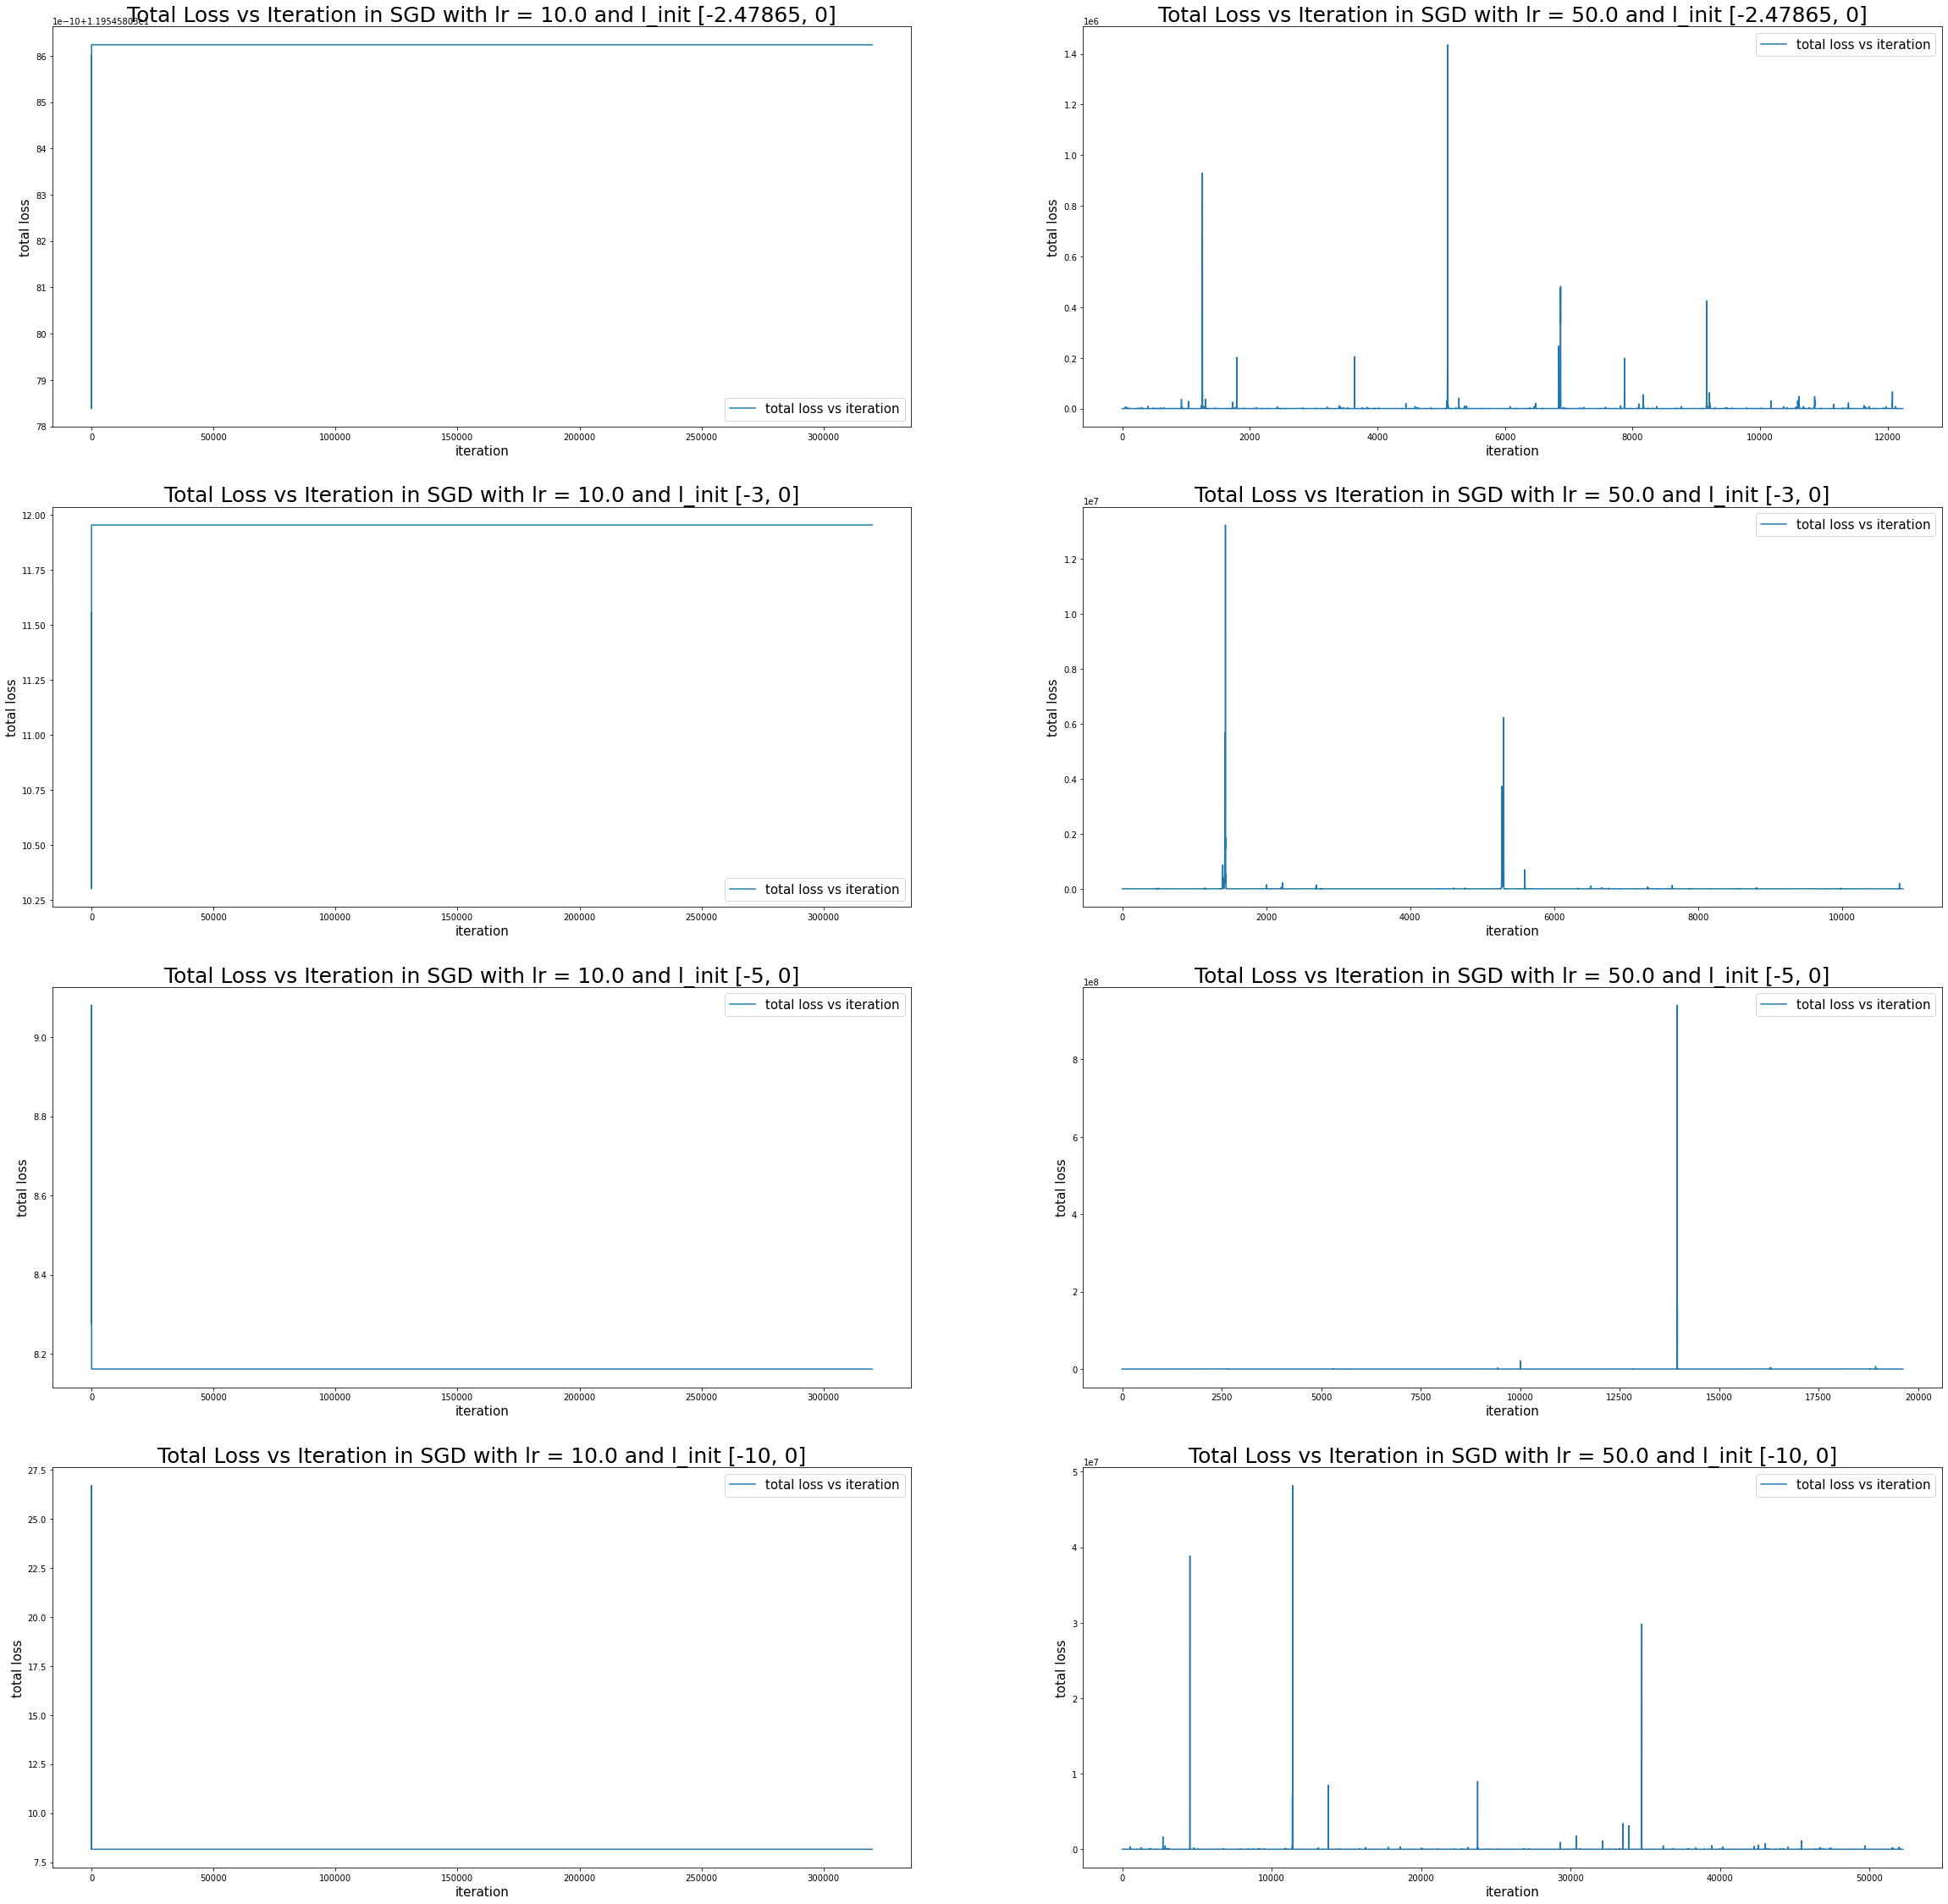

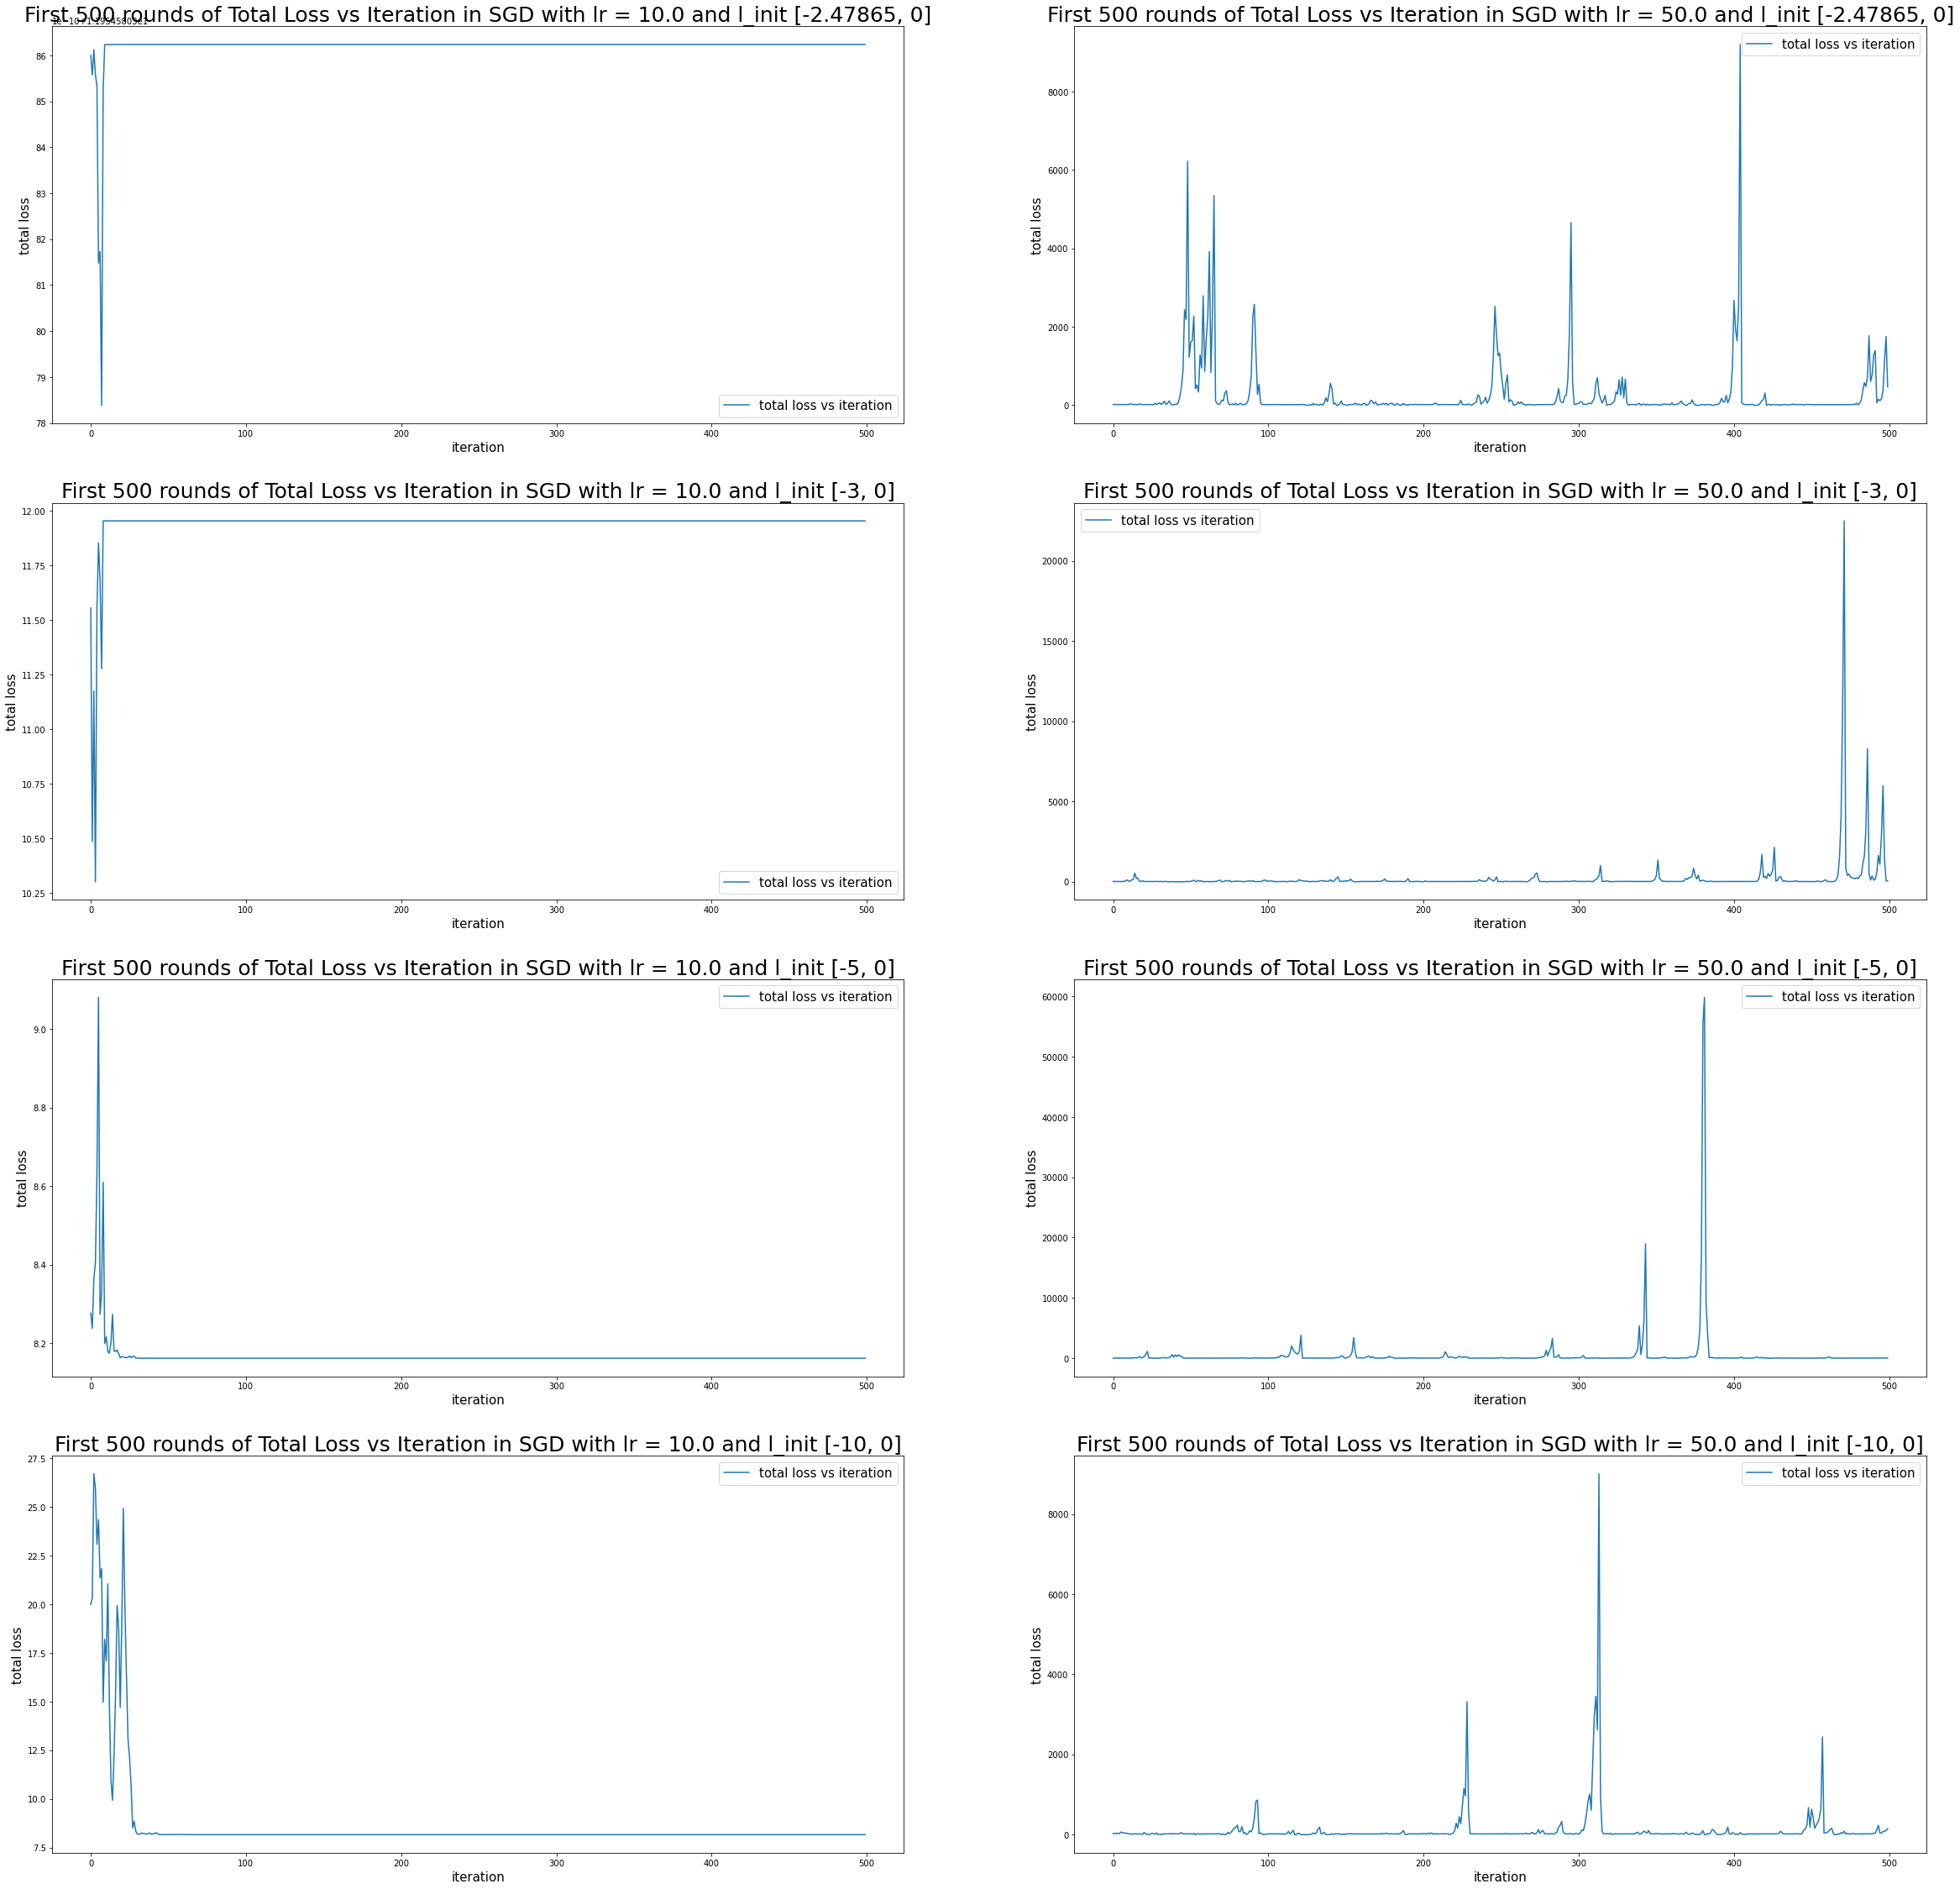

In [24]:
fig, ax = plt.subplots(4, 2, figsize=(40, 40))
fig1, ax1 = plt.subplots(4, 2, figsize=(40, 40))

for i in range(len(learning_rate)):
    for j in range(len(lambdas_inits)):
        lr = learning_rate[i]
        l_init = lambdas_inits[j]
        total_loss_sgd, avg_loss_history_lst_sgd, lambda_lst_sgd, grad_lst_sgd = sgd(loss, avg_loss, avg_df_loss, x = x, y = y, l_init = l_init, step_size = lr, threshold = 1e-3)
        print("learning rate: ", lr, "; lambda init", str(l_init))
        print("converged in %i round with last total loss function value of %.4f"%(len(total_loss_sgd), total_loss_sgd[-1]))
        print("-----------")
        
        # plot 
        ax[j][i].plot(range(len(total_loss_sgd)), total_loss_sgd, label='total loss vs iteration')
        ax[j][i].set_xlabel('iteration',  fontsize = 15)
        ax[j][i].set_ylabel('total loss', fontsize = 15)
        ax[j][i].set_title('Total Loss vs Iteration in SGD with lr = %.1f'%lr + ' and l_init '+str(l_init), fontsize = 25)
        ax[j][i].legend(loc='best', fontsize = 15)
        
        
        ax1[j][i].plot(range(len(total_loss_sgd[:500])), total_loss_sgd[:500], label='total loss vs iteration')
        ax1[j][i].set_xlabel('iteration',  fontsize = 15)
        ax1[j][i].set_ylabel('total loss', fontsize = 15)
        ax1[j][i].set_title('First 500 rounds of Total Loss vs Iteration in SGD with lr = %.1f'%lr + ' and l_init '+str(l_init), fontsize = 25)
        ax1[j][i].legend(loc='best', fontsize = 15)

<font color="darkblue">
    
**Interpretation**:
    
From the cases and graph above, we observe that four cases with `learning rate=50` in SGD all managed to get out of saddle point and eventually converged to global optimal `-9.93`, regardless of initial value of lambdas. It is because with the increase of step size and randomness of SGD algorithm, we are able to climb up hills, get ourselves out of current stationary points. SGD can jump out of local minimum and explore a larger and wider area. This could be also observed in ups and downs in objective function value in above graph (especially in first 500 rounds).

However, with smaller `learning rate = 10`, the hill climbing may be too slow and fall back to saddle points, stucked at the same stationary point. Thus there are other two trapped at stationary point `8.16`, which is the same point converged in GD. And there are additional two other cases trapped at stationary point `11.95`. The stationary point they end up with depends on their initialization and which stationary point are they closer to. And due to small learning rate, they were unable to slide to the direction of global optimal point, but converged to stationary points that are close to their initialization point.
    

<font color="darkblue">
    
**Summary:**

To conclude, it is reasonable to say that GD is **more sensitive to initialization** than SGD, since by changing the initial points, the GD may converge to a local minimum or stationary point nearby, and never be able to escape out of it. However, due to randomness introduced in algorithm, SGD could climb up hills even if trapped in stationary point, and explore a wider area and thus is more likely to converge to the global minimum. However, in SGD, convergence are also not guaranteed to happen. It needs an appropriate choice of learning rate. If step size is too small, it could failed to climb out of the local minimal even with randomness introduced. If it is too large, it could overshoot, and jumping around, preventing the algorithm from reaching global minimal and never converges.
  
We could say that the GD is more sensitive to initialization than SGD, while SGD is more sensitive to learning rate than GD.

### Part II: Broader Impact Analysis

Starting in 2020, major machine learning conferences are beginning to ask authors as well as reviewers to explicitly consider the broader impact of new machine learning methods. To properly evaluate the potential good or harm that a piece of technology (AI or not) can do to the general public, we need to be aware that no technology is deployed in ideal conditions or in perfectly neutral contexts. In order to assess the potential broader impact of technology, we need to analyze the social systems/institutions of which these technologies will become a part.

To help you analyze the broader impact of your technology, begin by considering the following questions:

I. Identify the relevant socio-technical systems
  - In what social, political, economic system could the tech be deployed?
  - How would the tech be used in these systems (what role will it take in the decision making processes)?<br><br>
  
II. Identify the stakeholders
  - Who are the users?
  - Who are the affected communities (are these the users)?
  
    ***Hint:*** users are typically decision makers who will use the technology as decision aids (e.g. doctors), whereas affected communities may be folks who are impacted by these decisions but who are not represented in the decision making process (e.g. patients).<br><br>
    
III. What types of harm can this tech do?
  - What kinds of failures can this tech have?
  - What kinds of direct harm can these failures cause?
  - What kinds of harm can the socio-technical system cause?
  
    ***Hint:*** many technical innovations have niche applications, they may sit in a long chain of decision making in a complex system. As such, it may seem, at first glance, that these technologies have no immediate real-life impact. In these cases, it’s helpful to think about the impact of the entire system and then think about how the proposed innovations aid, hamper or change the goals or outcomes of this system.<br><br>
    
IV. What types of good can this tech do?
  - What kinds of needs do these users/communities have?
  - What kinds of constraints do these users/communities have?

1. **(Impact)** Analyze the broader impact of this pricing model. Focus on anticipating ways these models can interact with other components of the decision systems in which they will be deployed, identifying end-users, affected communities as well as anticipating the effects (positive and negative) on affected communities (in particular, does the model have the same effect on all subpopulations in the affected communities?). 

  ***Hint:*** the objective function we are minimizing here is the construction cost, who benifits from minimizing the this objective function, whose utility function might be in tension with this objective function?
  
  How do the quirks and artifacts of the optimization algorithm impact the end-user (i.e. how is your end-user affected by the optimization procedure and the hyperparameters you choose)? How do your design choices in optimization impact the affected community?

<font color="darkblue">
    
**Interpretation**:


The pricing model is built for minimizing construction cost for laying down new fibre optics high-speed internet cables under region in the Boston area. The model takes as input a pair of coordinates,  $(x, y)$ , and contains two parameters $\lambda_1$,$\lambda_2$ . Given a coordinate,  $(x, y)$ and model parameters, we minimize the objective function of construction cost.
    
Thinking about end users, it will be
* Property developers and real estate development corporations that work on constructions
* Government agencies that work on urban planning

And affected communities will be 
* Boston citizens and companies who pay for the high-speed internet cables and fibre optics construction
* Labor forces who worked for construction project
    
    
Thus, the urban planning, property developers and real estate development corporations will benefit from minimizing this objective function. Construction companies could use this algorithms to minimize their investment and sunk cost, and stay within their budget constraints, giving themselves more space for financial year planning and liquidity. Government and urban planning department could use this model to do budget planning, allocate, approve and distribute government resources, as well as planning for tax. 
    
Boston citizens and labor forces that construct the fibre optics, on the other side, may be negatively impacted and in tension with this objective function. Citizens may need to pay higher fee for the high speed internet with asymmetric information of how much construction budget invested. Low budget construction may also result in lower quality internet infrastructure, higher repairment request, not enough lifespan etc. Besides, citizens could also potentially be over-taxed by government. For labor force that work for construction company, the planned low budget may not neccessarily reflect in a higher income for them, instead, they may have to work overtime and be more stressful to finish construction within the budget. 

<font color="darkblue">


Quriks and artifacts of the optimization algorithm could impact end users in many ways:

* **Optimization Procedure**: It is a decision choice to make whether to use GD or SGD, if we prefer GD, it may converge faster but it could stuck in local optima instead of global optima, giving construction company misleading information; it we choose SGD, it could help climb out of local optima with the introduce of randomness, but it may take longer time and more computation resources to complete the iterations for its convergence.

* **Hyperparameter**: If we select a learning rate that is too small, it may take long time and computational resource to find optimal value. In SGD, if learning rate is too small, even with randomness introduced, they may not be able to climb up hill and escape out of local optima. It will give construction company wrong information, and consequently impact everyone in the chain of decision and action; If we choose a learning rate that is too large, it could take less time, or it may overshoot and jump around, and never converge. It could even diverge and give extremely misleading information for construction team.

* **Whether we find global optima**: this affect both government, urban planning, construction team and Boston citizens. If the model gives local optima, it could be a maxima or saddle point, which actually result in a higher construction cost than usual. It may negatively impact all affected communities and end users.

* **Generalizability and Scalabitiy of the Algorithm**: This will affect end user more than the rest. Generalizaibiity and scalaibility decide whether this model could be used in future case or in wider area, and eventually reaches higher efficiency or economie of scale. If not, it may still be costly for construction companies and government to build new models each time.